In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


I have mounted form my drive since the dataset was large to upload everytime. I have attached the dataset in the zip files

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/studentVle.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [ ]:
print(data.duplicated().sum())

787170


In [ ]:
# Load the additional dataset
file_path_additional = "/content/vle.csv"
additional_data = pd.read_csv(file_path_additional)

# Display the first few rows of the additional dataset to understand its structure
additional_data.head()

id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AAA             2013J      resource        NaN      NaN

In [ ]:
# Merge the datasets
merged_data = pd.merge(data, additional_data, on=['id_site', 'code_module', 'code_presentation'], how='inner')

# Display the first few rows of the merged dataset to verify
merged_data.head()


code_module code_presentation  id_student  id_site  date  sum_click  \
0         AAA             2013J       28400   546652   -10          4   
1         AAA             2013J       28400   546652   -10          1   
2         AAA             2013J       28400   546652   -10          1   
3         AAA             2013J       28400   546652   -10          8   
4         AAA             2013J       30268   546652   -10          3   

  activity_type  week_from  week_to  
0       forumng        NaN      NaN  
1       forumng        NaN      NaN  
2       forumng        NaN      NaN  
3       forumng        NaN      NaN  
4       forumng        NaN      NaN

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   code_module        object 
 1   code_presentation  object 
 2   id_student         int64  
 3   id_site            int64  
 4   date               int64  
 5   sum_click          int64  
 6   activity_type      object 
 7   week_from          float64
 8   week_to            float64
dtypes: float64(2), int64(4), object(3)
memory usage: 731.6+ MB


In [ ]:
# Checking for missing values
missing_values = merged_data.isnull().sum()
print(missing_values)
# Checking for duplicates
duplicates = merged_data.duplicated().sum()
print("Dulicates:", duplicates)

code_module                0
code_presentation          0
id_student                 0
id_site                    0
date                       0
sum_click                  0
activity_type              0
week_from            9269544
week_to              9269544
dtype: int64
Dulicates: 787170


In [ ]:
# Remove duplicate rows
merged_data_cleaned = merged_data.drop_duplicates()

# Drop columns with excessive missing values
merged_data_cleaned = merged_data_cleaned.drop(columns=['week_from', 'week_to'])

# Display the first few rows of the cleaned dataset
merged_data_cleaned.head(), merged_data_cleaned.isnull().sum()


(  code_module code_presentation  id_student  id_site  date  sum_click  \
 0         AAA             2013J       28400   546652   -10          4   
 1         AAA             2013J       28400   546652   -10          1   
 3         AAA             2013J       28400   546652   -10          8   
 4         AAA             2013J       30268   546652   -10          3   
 5         AAA             2013J       30268   546652   -10          2   
 
   activity_type  
 0       forumng  
 1       forumng  
 3       forumng  
 4       forumng  
 5       forumng  ,
 code_module          0
 code_presentation    0
 id_student           0
 id_site              0
 date                 0
 sum_click            0
 activity_type        0
 dtype: int64)

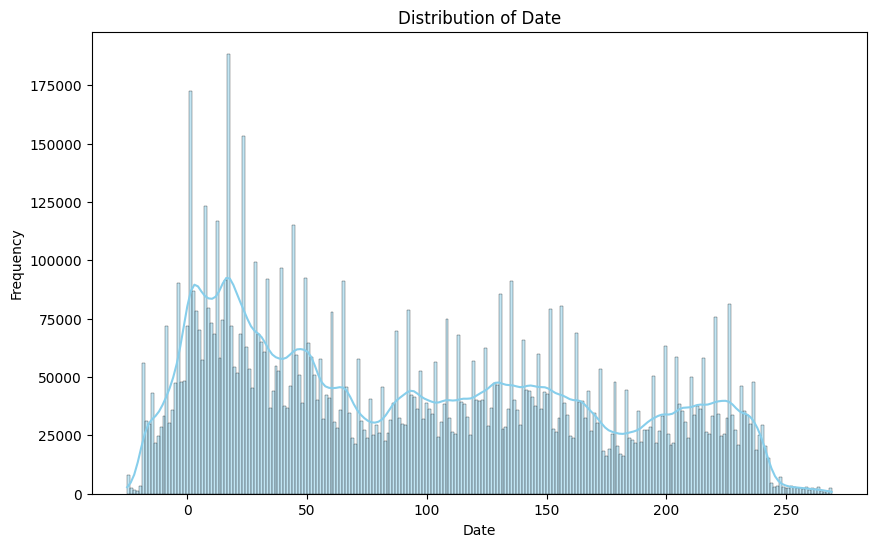

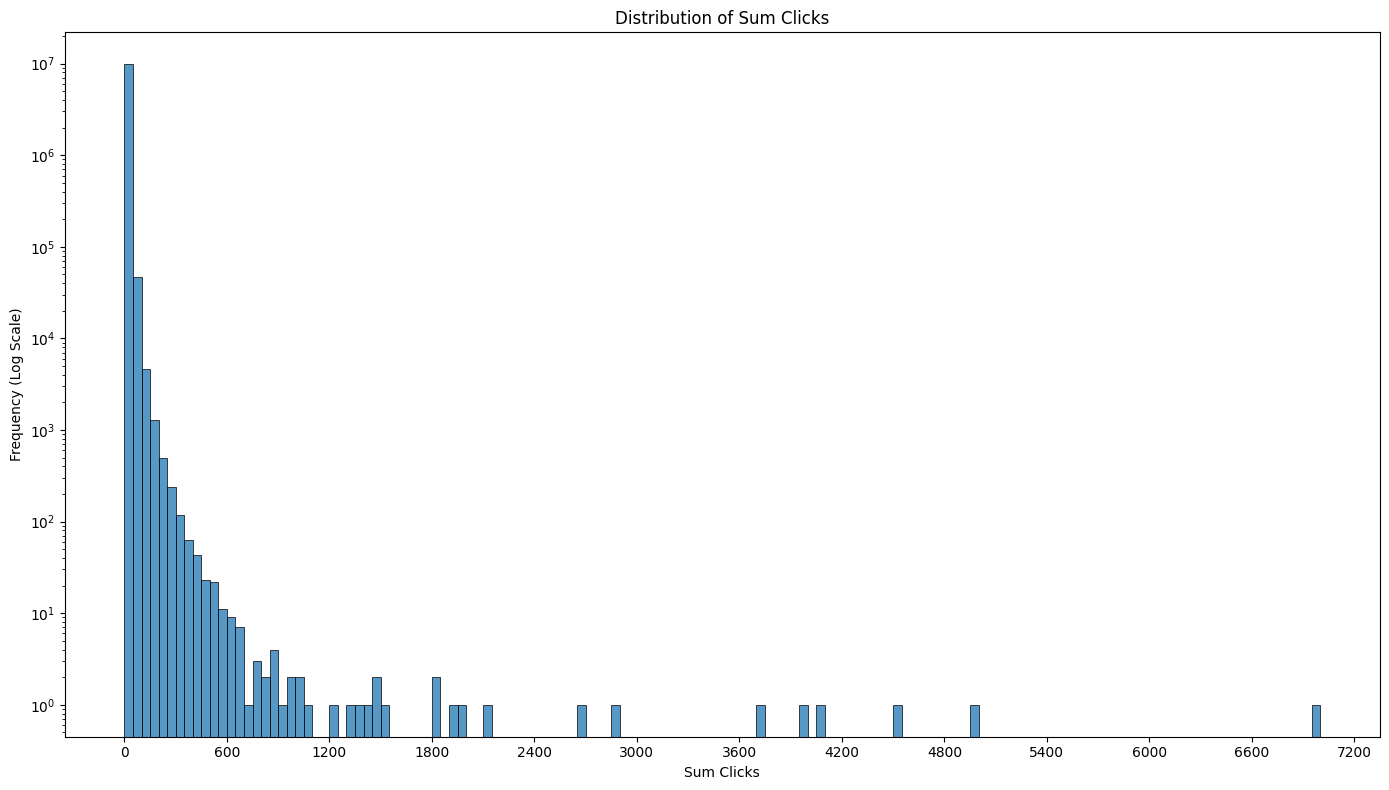

<ipython-input-12-7121ecaf4f76>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=merged_data_cleaned, x='activity_type', palette='viridis')


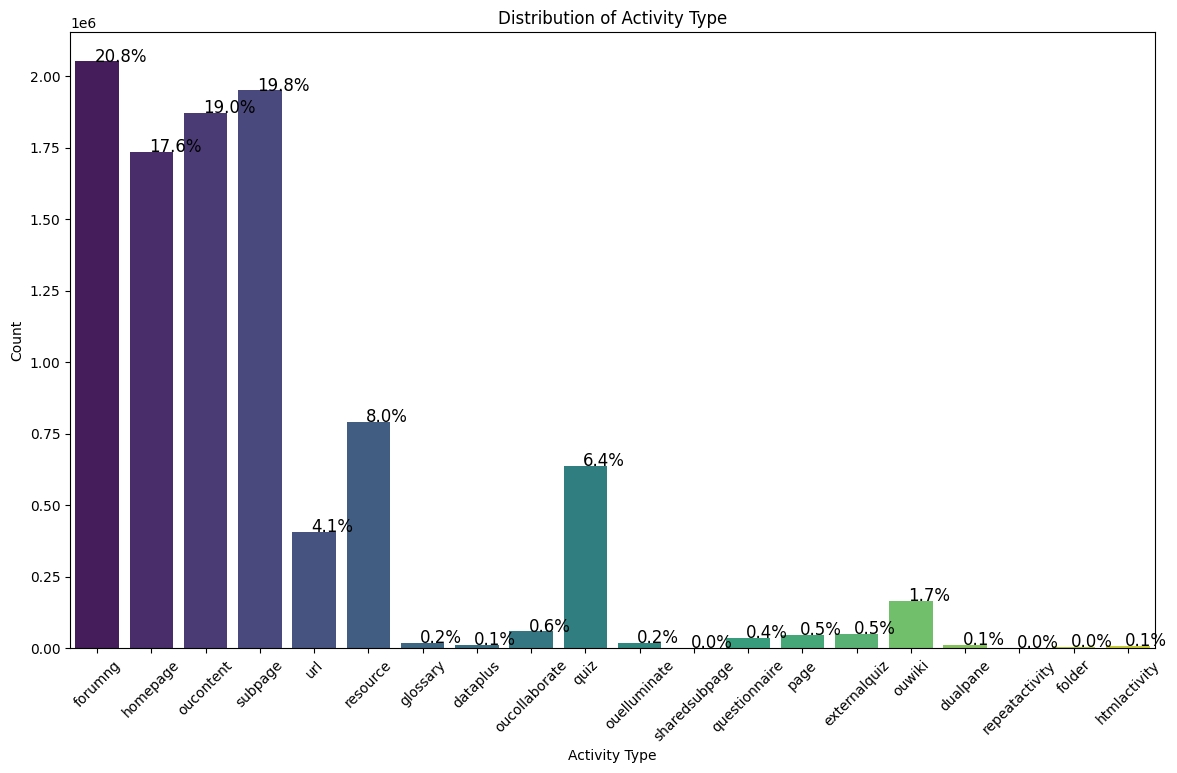

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of 'date' with KDE
plt.figure(figsize=(10, 6))
sns.histplot(merged_data_cleaned['date'], kde=True, color='skyblue')
plt.title('Distribution of Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import pandas as pd

# Assuming merged_data_cleaned is already loaded and cleaned

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Step 1: Histogram of sum_click with appropriate bins
# Using bins of width 50 to better represent the diverse range of values
bins = range(0, merged_data_cleaned['sum_click'].max() + 50, 50)
sns.histplot(merged_data_cleaned['sum_click'], bins=bins, kde=False)

# Use logarithmic scale for y-axis to handle wide range of frequencies
plt.yscale('log')
plt.title('Distribution of Sum Clicks')
plt.xlabel('Sum Clicks')
plt.ylabel('Frequency (Log Scale)')

# Set x-ticks to show approximately 15 intervals
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=15))

plt.tight_layout()
plt.show()


# Distribution of 'activity_type' with Percentage Labels
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=merged_data_cleaned, x='activity_type', palette='viridis')
total = len(merged_data_cleaned['activity_type'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y), size=12)
plt.title('Distribution of Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-13-91ea9268b729>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data_cleaned, x='activity_type', y='sum_click', palette='Set3')


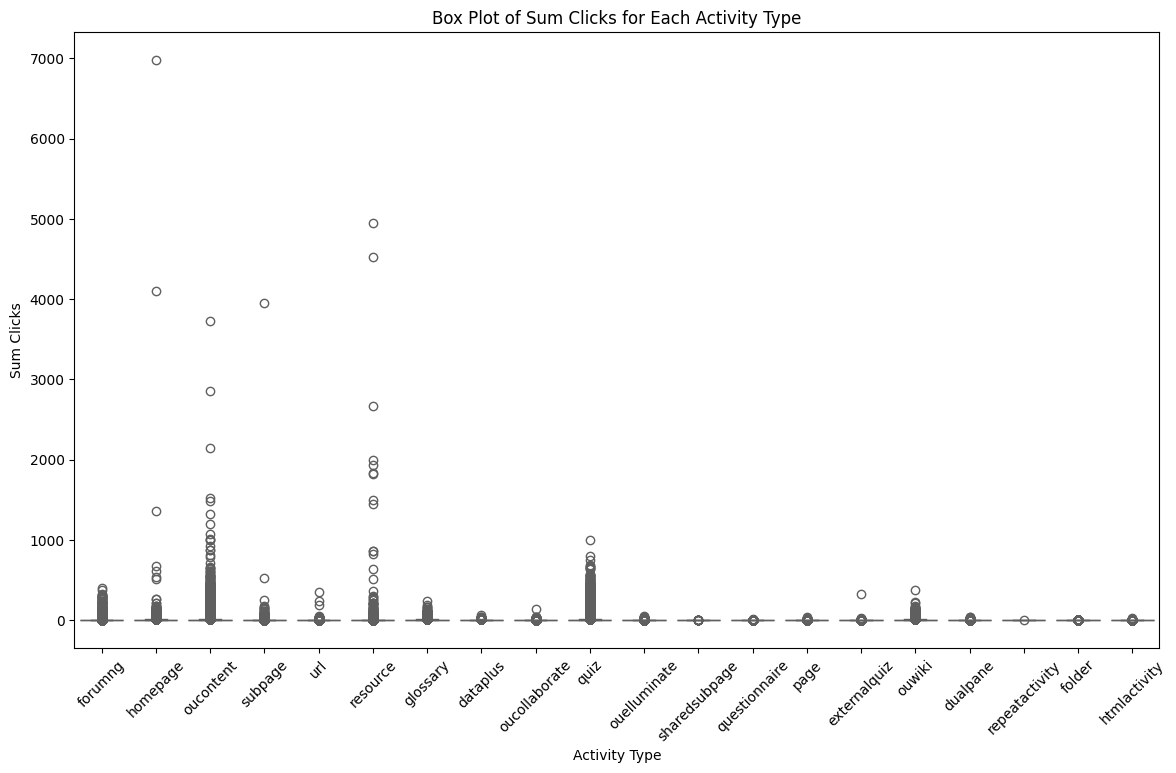

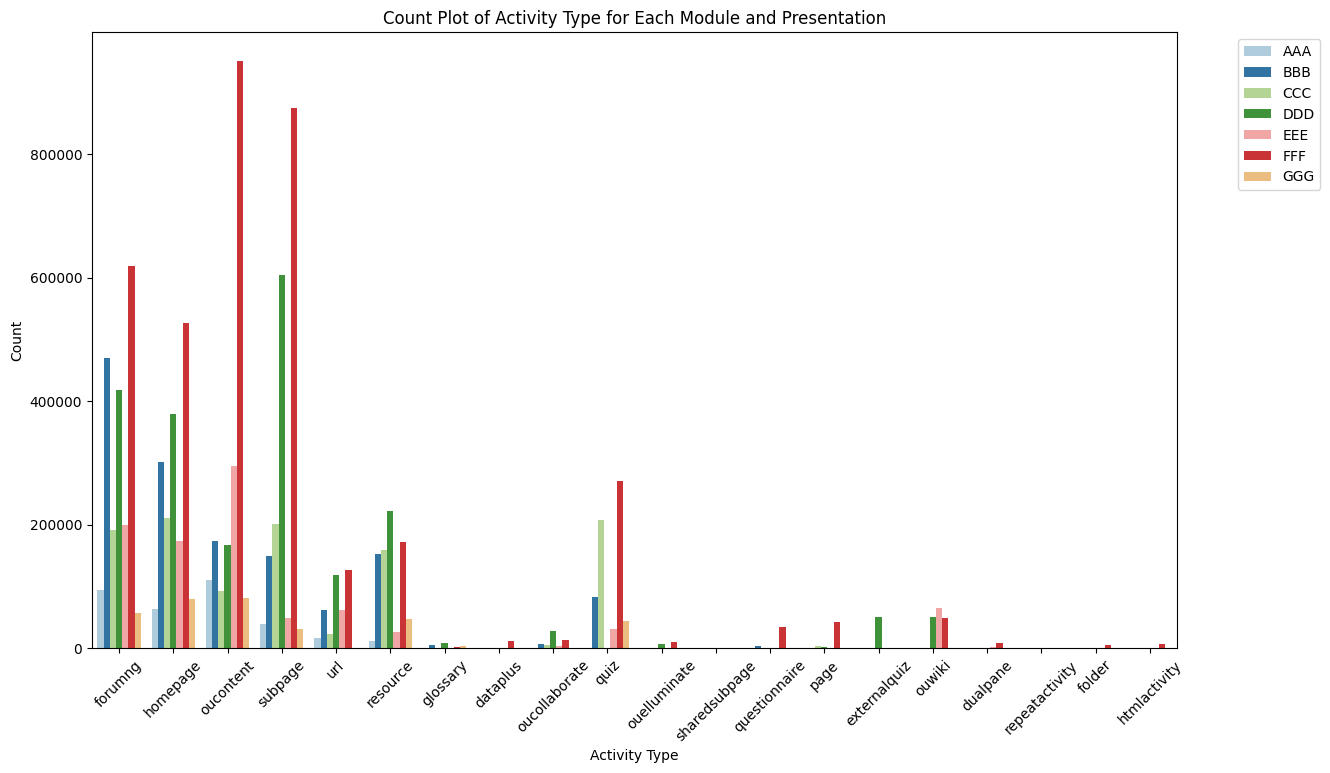

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data_cleaned is already loaded and cleaned

# # 1. Heatmap of Sum Clicks Over Time for Each Module and Presentation
# plt.figure(figsize=(14, 8))
# heatmap_data = merged_data_cleaned.pivot_table(values='sum_click', index='date', columns=['code_module', 'code_presentation'], aggfunc='sum')
# sns.heatmap(heatmap_data, cmap='viridis')
# plt.title('Heatmap of Sum Clicks Over Time for Each Module and Presentation')
# plt.xlabel('Module and Presentation')
# plt.ylabel('Date')
# plt.show()

# 2. Box Plot of Sum Clicks for Each Activity Type
plt.figure(figsize=(14, 8))
sns.boxplot(data=merged_data_cleaned, x='activity_type', y='sum_click', palette='Set3')
plt.title('Box Plot of Sum Clicks for Each Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Sum Clicks')
plt.xticks(rotation=45)
plt.show()

# # 3. Line Plot of Sum Clicks Over Time for Each Module and Presentation
# plt.figure(figsize=(14, 8))
# sns.lineplot(data=merged_data_cleaned, x='date', y='sum_click', hue='code_module', style='code_presentation', markers=True, dashes=False)
# plt.title('Line Plot of Sum Clicks Over Time for Each Module and Presentation')
# plt.xlabel('Date')
# plt.ylabel('Sum Clicks')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

# 4. Count Plot of Activity Type for Each Module and Presentation
plt.figure(figsize=(14, 8))
sns.countplot(data=merged_data_cleaned, x='activity_type', hue='code_module', palette='Paired')
plt.title('Count Plot of Activity Type for Each Module and Presentation')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


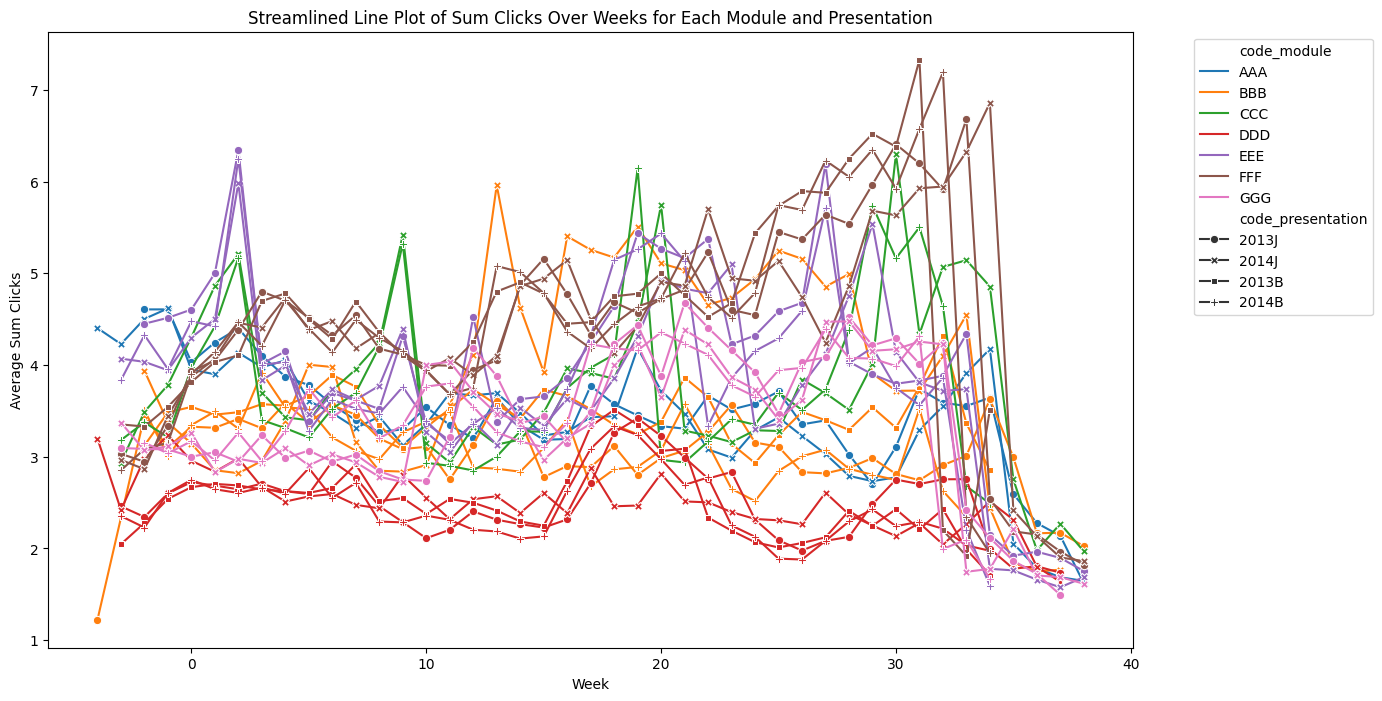

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data_cleaned is already loaded and cleaned

# Aggregate data by week
merged_data_cleaned['week'] = merged_data_cleaned['date'] // 7
weekly_data = merged_data_cleaned.groupby(['code_module', 'code_presentation', 'week'])['sum_click'].mean().reset_index()

# Streamlined Line Plot of Sum Clicks Over Weeks for Each Module and Presentation
plt.figure(figsize=(14, 8))
sns.lineplot(data=weekly_data, x='week', y='sum_click', hue='code_module', style='code_presentation', markers=True, dashes=False)
plt.title('Streamlined Line Plot of Sum Clicks Over Weeks for Each Module and Presentation')
plt.xlabel('Week')
plt.ylabel('Average Sum Clicks')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Load the new dataset containing module presentation length
courses_data = pd.read_csv('/content/courses.csv')



# Merge the new dataset with the existing merged dataset
merged_data_with_length = pd.merge(
    merged_data_cleaned,
    courses_data[['code_module', 'code_presentation', 'module_presentation_length']],
    on=['code_module', 'code_presentation'],
    how='left'
)

merged_data_with_length.head()

# # Save the new merged dataset if needed
# merged_data_with_length.to_csv('path_to_your/merged_data_with_length.csv', index=False)

code_module code_presentation  id_student  id_site  date  sum_click  \
0         AAA             2013J       28400   546652   -10          4   
1         AAA             2013J       28400   546652   -10          1   
2         AAA             2013J       28400   546652   -10          8   
3         AAA             2013J       30268   546652   -10          3   
4         AAA             2013J       30268   546652   -10          2   

  activity_type  week  module_presentation_length  
0       forumng    -2                         268  
1       forumng    -2                         268  
2       forumng    -2                         268  
3       forumng    -2                         268  
4       forumng    -2                         268

In [ ]:
merged_data_with_length.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9868110 entries, 0 to 9868109
Data columns (total 9 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   code_module                 object
 1   code_presentation           object
 2   id_student                  int64 
 3   id_site                     int64 
 4   date                        int64 
 5   sum_click                   int64 
 6   activity_type               object
 7   week                        int64 
 8   module_presentation_length  int64 
dtypes: int64(6), object(3)
memory usage: 677.6+ MB


## Student info merge


In [ ]:
# Load the studentInfo dataset
student_info_data = pd.read_csv('/content/studentInfo.csv')
final_result_distribution_1= student_info_data['final_result'].value_counts(normalize=True) * 100





In [ ]:
# Perform the final merge with the updated merged_data_cleaned and student_info_data
final_merged_data = pd.merge(
    merged_data_with_length,
    student_info_data[['code_module', 'code_presentation', 'id_student', 'final_result']],
    on=['code_module', 'code_presentation', 'id_student'],
    how='left'
)

In [ ]:
final_merged_data.head(50)

code_module code_presentation  id_student  id_site  date  sum_click  \
0          AAA             2013J       28400   546652   -10          4   
1          AAA             2013J       28400   546652   -10          1   
2          AAA             2013J       28400   546652   -10          8   
3          AAA             2013J       30268   546652   -10          3   
4          AAA             2013J       30268   546652   -10          2   
5          AAA             2013J       32885   546652   -10          1   
6          AAA             2013J       32885   546652   -10          3   
7          AAA             2013J       32885   546652   -10          4   
8          AAA             2013J       38053   546652   -10          5   
9          AAA             2013J       38053   546652   -10         11   
10         AAA             2013J       45462   546652   -10          1   
11         AAA             2013J       58873   546652   -10          8   
12         AAA             2013J       58873   546652   -10          1   
13         AAA             2013J       59185   546652   -10          4   
14         AAA             2013J       58873   546652   -10          5   
15         AAA             2013J       59185   546652   -10          2   
16         AAA             2013J       62155   546652   -10          1   
17         AAA             2013J       70464   546652   -10          2   
18         AAA             2013J       70464   546652   -10          3   
19         AAA             2013J       71361   546652   -10          3   
20         AAA             2013J       71361   546652   -10          4   
21         AAA             2013J       75091   546652   -10         12   
22         AAA             2013J       75091   546652   -10          6   
23         AAA             2013J       77367   546652   -10          4   
24         AAA             2013J       77367   546652   -10          1   
25         AAA             2013J       94961   546652   -10          2   
26         AAA             2013J       98094   546652   -10          3   
27         AAA             2013J      101781   546652   -10          1   
28         AAA             2013J      106577   546652   -10          1   
29         AAA             2013J      104476   546652   -10          3   
30         AAA             2013J      104476   546652   -10          4   
31         AAA             2013J      114999   546652   -10          2   
32         AAA             2013J      114999   546652   -10          3   
33         AAA             2013J      111717   546652   -10          3   
34         AAA             2013J      111717   546652   -10          1   
35         AAA             2013J      127582   546652   -10          2   
36         AAA             2013J      127582   546652   -10          1   
37         AAA             2013J      137873   546652   -10          3   
38         AAA             2013J      137873   546652   -10          2   
39         AAA             2013J      144801   546652   -10          3   
40         AAA             2013J      144801   546652   -10          6   
41         AAA             2013J      144801   546652   -10          1   
42         AAA             2013J      148993   546652   -10          1   
43         AAA             2013J      148993   546652   -10          4   
44         AAA             2013J      148993   546652   -10          5   
45         AAA             2013J      238007   546652   -10          4   
46         AAA             2013J      238007   546652   -10          6   
47         AAA             2013J      241649   546652   -10          3   
48         AAA             2013J      241649   546652   -10          2   
49         AAA             2013J      248270   546652   -10          4   

   activity_type  week  module_presentation_length final_result  
0        forumng    -2                         268         Pass  
1        forumng    -2                         268         Pass  
2        forumng    -2        

In [ ]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9868110 entries, 0 to 9868109
Data columns (total 10 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   code_module                 object
 1   code_presentation           object
 2   id_student                  int64 
 3   id_site                     int64 
 4   date                        int64 
 5   sum_click                   int64 
 6   activity_type               object
 7   week                        int64 
 8   module_presentation_length  int64 
 9   final_result                object
dtypes: int64(6), object(4)
memory usage: 752.9+ MB


In [ ]:
import pandas as pd
import numpy as np
from joblib import Parallel, delayed
import multiprocessing



# Function to determine the phase
def determine_phase(row):
    length = row['module_presentation_length']
    date = row['date']
    if date <= 0.25 * length:
        return 'phase_25'
    elif date <= 0.50 * length:
        return 'phase_50'
    elif date <= 0.75 * length:
        return 'phase_75'
    else:
        return 'phase_100'

# Apply the function to determine the phase for each row
final_merged_data['phase'] = final_merged_data.apply(determine_phase, axis=1)

# Ensure the necessary columns are present
required_columns = ['id_student', 'sum_click', 'date', 'activity_type', 'module_presentation_length', 'final_result']
missing_columns = [column for column in required_columns if column not in final_merged_data.columns]
if missing_columns:
    raise KeyError(f"One or more required columns are missing in the data: {missing_columns}")

# Function to create features for each phase
def create_phase_features(phase_data, phase_name):
    phase_features = phase_data.groupby('id_student').agg(
        total_clicks=('sum_click', 'sum'),
        avg_clicks_per_day=('sum_click', 'mean'),
        max_clicks_per_day=('sum_click', 'max'),
        days_with_no_activity=('sum_click', lambda x: (x == 0).sum()),
        variance_of_clicks=('sum_click', 'var'),
        num_activity_types=('activity_type', 'nunique'),
        most_frequent_activity_type=('activity_type', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
        active_days=('date', 'nunique'),
        interaction_gap=('date', lambda x: (x.max() - x.min()) / x.nunique() if x.nunique() > 1 else 0),
        first_interaction_date=('date', 'min'),
        last_interaction_date=('date', 'max'),
    ).reset_index()

    # Calculate Project Trajectory Score
    phase_features['project_trajectory_score'] = phase_features['total_clicks'] / (phase_data['date'].max() / phase_data['module_presentation_length'].max())

    # Calculate Dynamic Interaction Index
    dynamic_interaction_index = phase_data.groupby('id_student')['sum_click'].std() / phase_data.groupby('id_student')['sum_click'].sum()
    phase_features['dynamic_interaction_index'] = dynamic_interaction_index.reset_index(drop=True)

    # Print columns to debug
    print(f"Columns in phase_features for {phase_name}: {phase_features.columns}")
    print(f"Columns in student_info_data: {student_info_data.columns}")

    phase_features = pd.merge(phase_features, student_info_data[['id_student', 'final_result']], on='id_student', how='left')
    phase_features.to_csv(f'{phase_name}_features.csv', index=False)
    return phase_features

# Split the data into different phases
phase_data_dict = {
    'phase_25': final_merged_data[final_merged_data['phase'] == 'phase_25'],
    'phase_50': final_merged_data[final_merged_data['phase'] == 'phase_50'],
    'phase_75': final_merged_data[final_merged_data['phase'] == 'phase_75'],
    'phase_100': final_merged_data[final_merged_data['phase'] == 'phase_100']
}

# Number of cores for parallel processing
num_cores = multiprocessing.cpu_count()

# Generate features for each phase using parallel processing
phase_features_list = Parallel(n_jobs=num_cores)(
    delayed(create_phase_features)(data, phase_name) for phase_name, data in phase_data_dict.items()
)

# Combine all phase features into a single DataFrame for further analysis
all_phase_features = pd.concat(phase_features_list, ignore_index=True)

# Save combined features
all_phase_features.to_csv('all_phase_features.csv', index=False)


In [ ]:
phase_25_features = pd.read_csv("/content/phase_25_features.csv")
phase_50_features = pd.read_csv("/content/phase_50_features.csv")
phase_75_features = pd.read_csv("/content/phase_75_features.csv")
phase_100_features = pd.read_csv("/content/phase_100_features.csv")

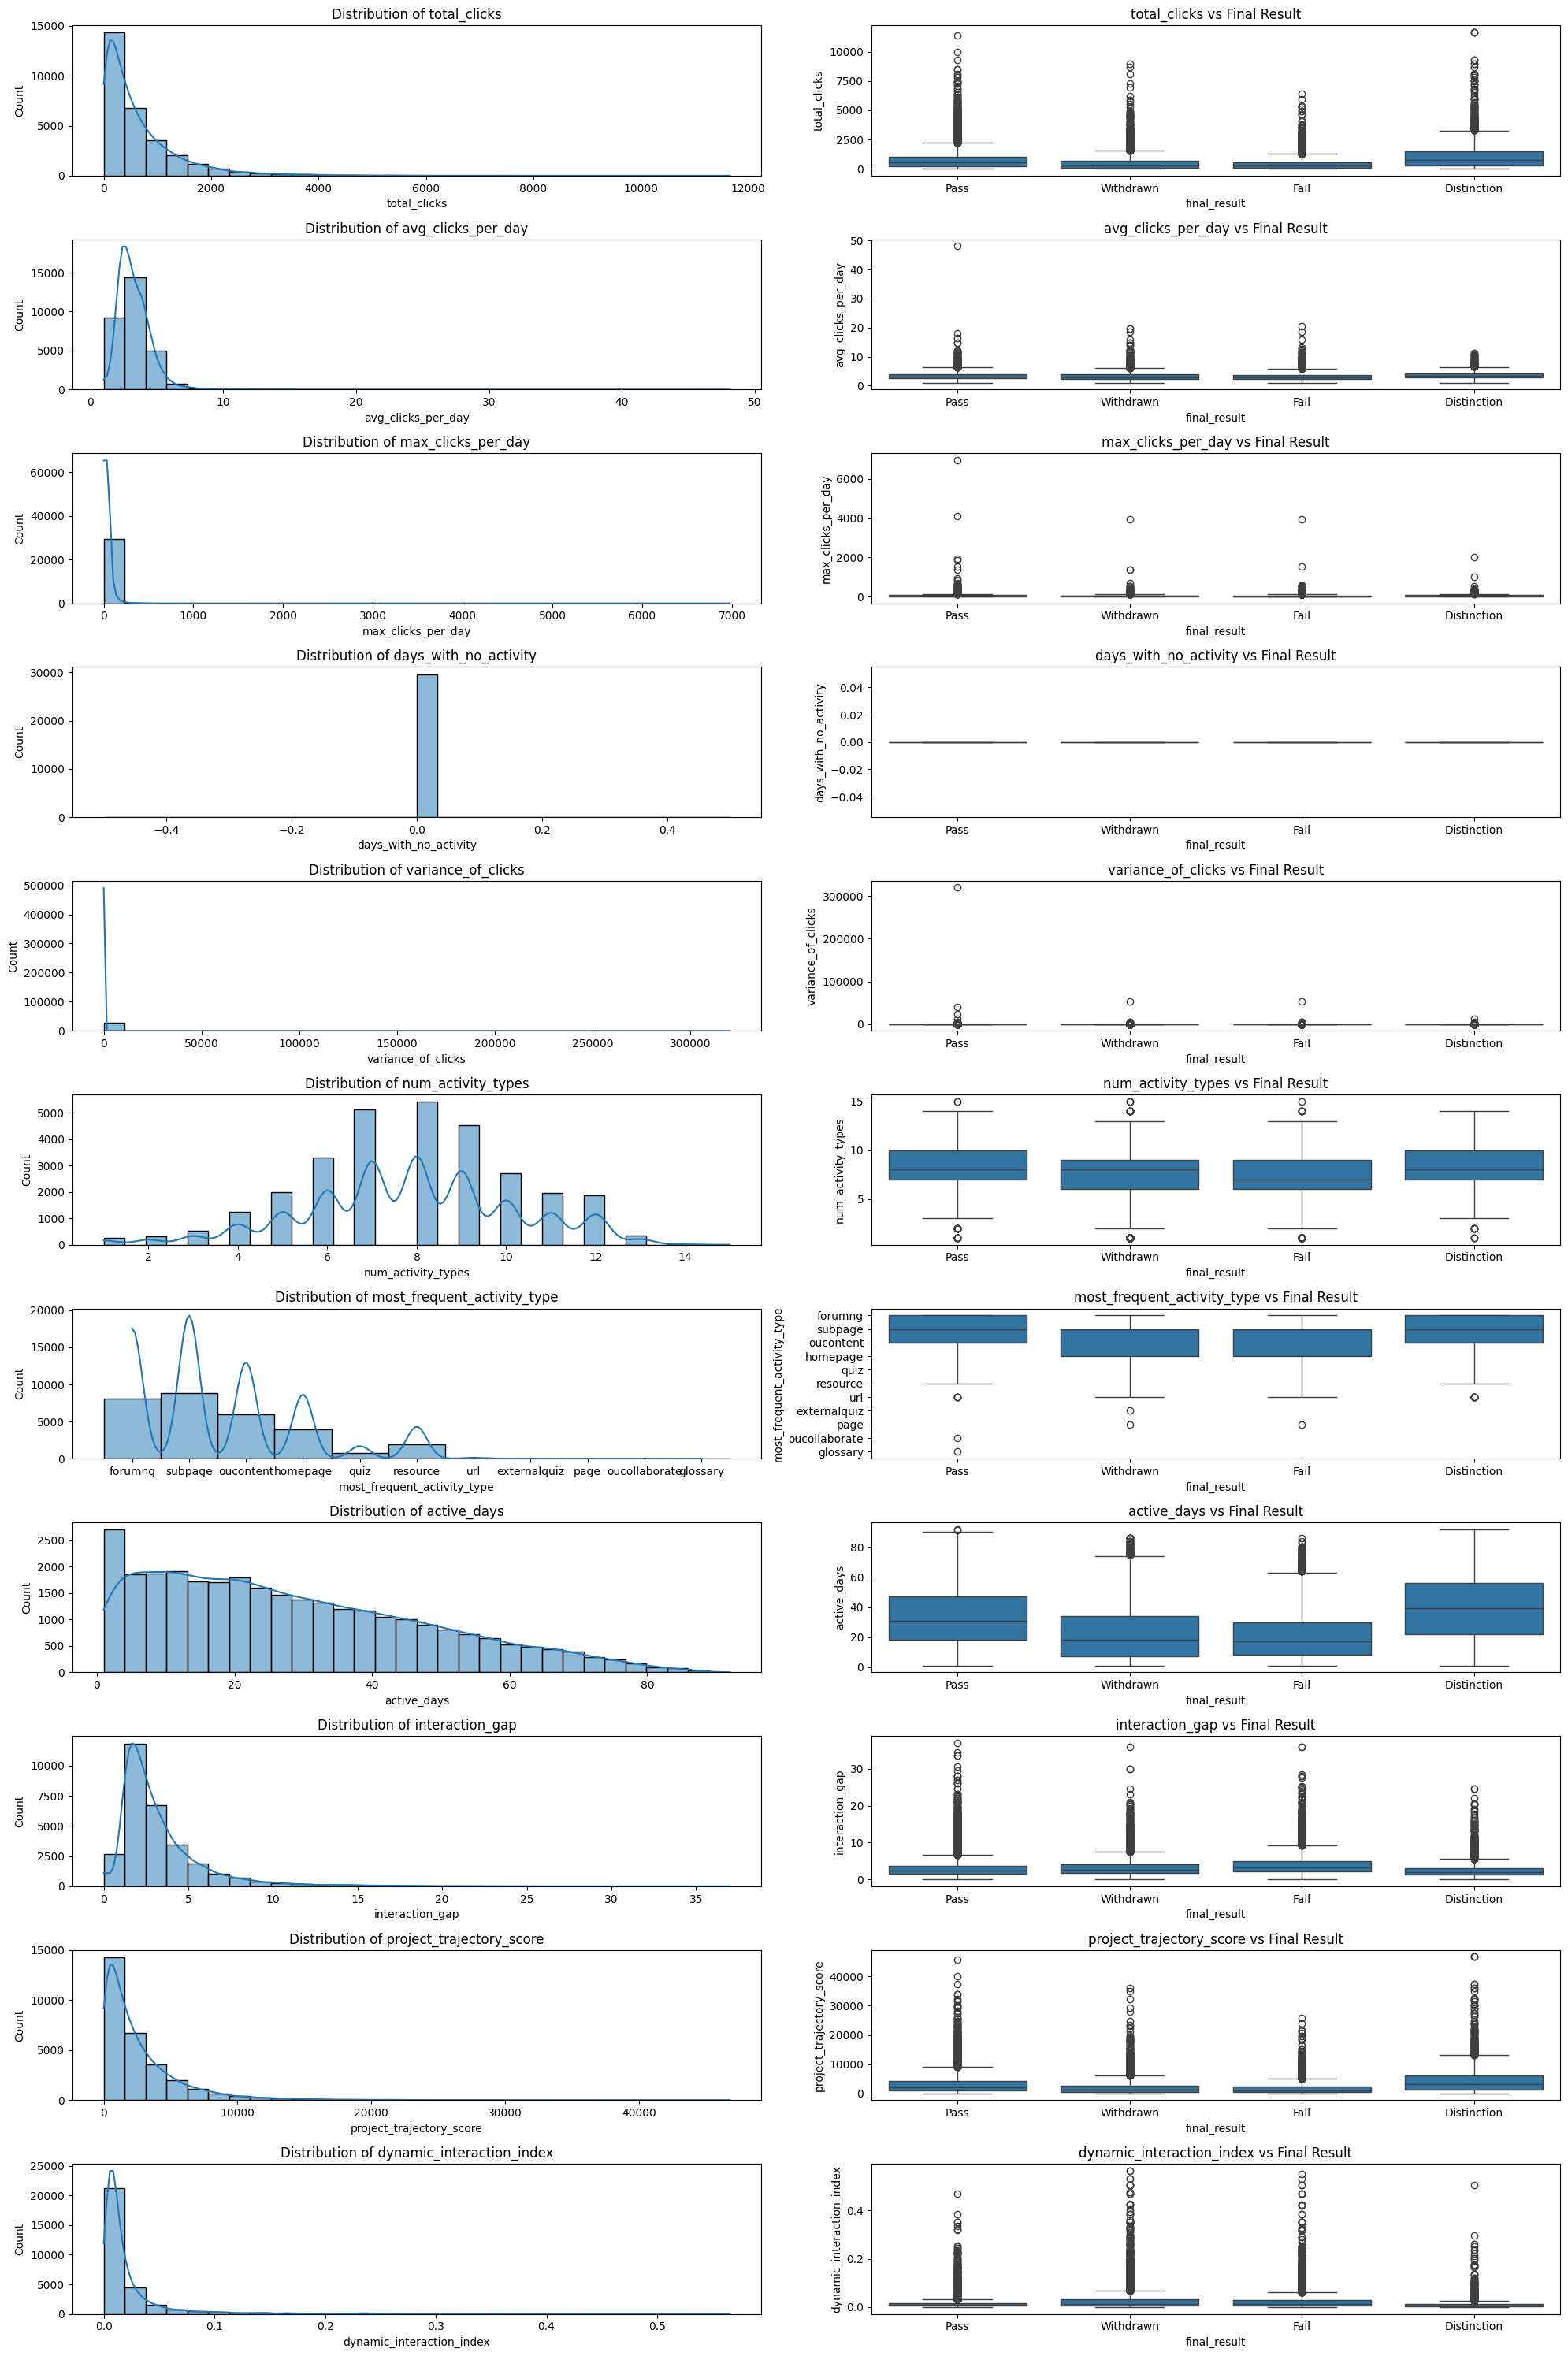

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define the features to plot
features = [
    'total_clicks', 'avg_clicks_per_day', 'max_clicks_per_day', 'days_with_no_activity',
    'variance_of_clicks', 'num_activity_types', 'most_frequent_activity_type',
    'active_days', 'interaction_gap', 'project_trajectory_score', 'dynamic_interaction_index'
]

# Set up the matplotlib figure for individual distributions
plt.figure(figsize=(20, 30))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 2, 2 * i - 1)
    sns.histplot(phase_25_features[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

    plt.subplot(len(features), 2, 2 * i)
    sns.boxplot(x='final_result', y=feature, data=phase_25_features)
    plt.title(f'{feature} vs Final Result')

plt.tight_layout()
plt.show()


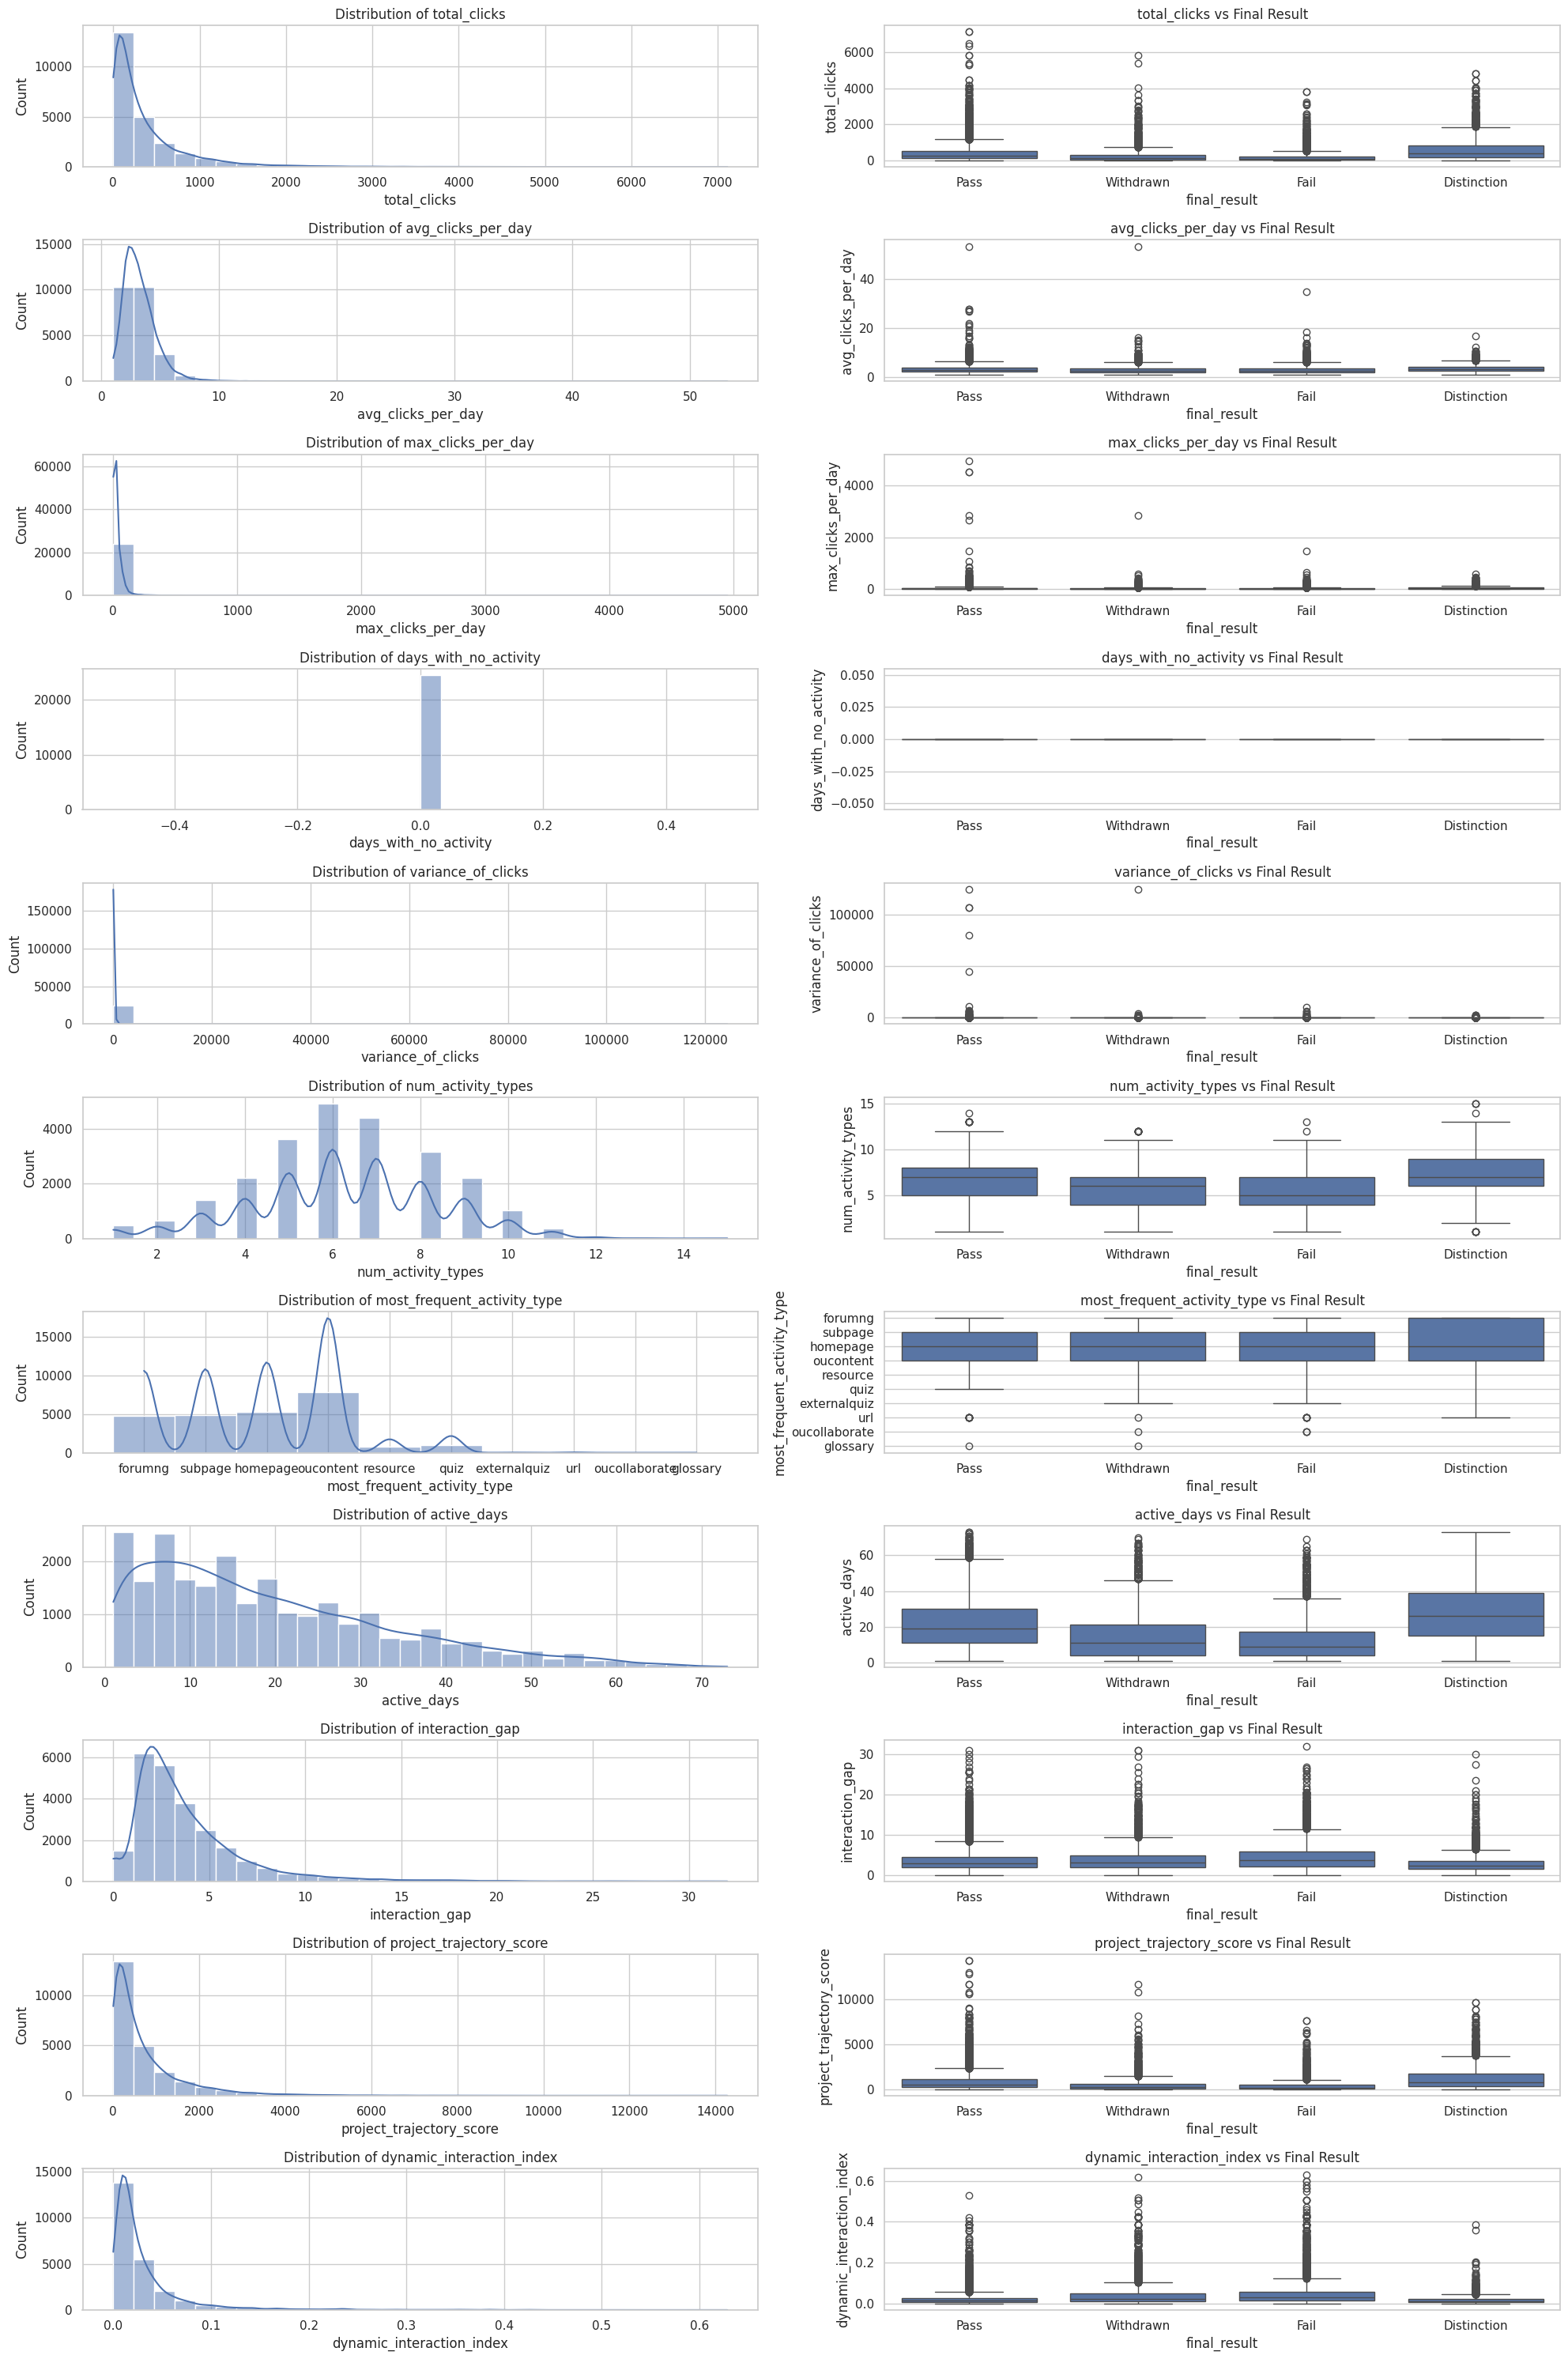

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define the features to plot
features = [
    'total_clicks', 'avg_clicks_per_day', 'max_clicks_per_day', 'days_with_no_activity',
    'variance_of_clicks', 'num_activity_types', 'most_frequent_activity_type',
    'active_days', 'interaction_gap', 'project_trajectory_score', 'dynamic_interaction_index'
]

# Set up the matplotlib figure for individual distributions
plt.figure(figsize=(20, 30))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 2, 2 * i - 1)
    sns.histplot(phase_50_features[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

    plt.subplot(len(features), 2, 2 * i)
    sns.boxplot(x='final_result', y=feature, data=phase_50_features)
    plt.title(f'{feature} vs Final Result')

plt.tight_layout()
plt.show()


<ipython-input-29-738970d6ad56>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='final_result', y=feature, data=phase_features, palette='viridis', jitter=True)
<ipython-input-29-738970d6ad56>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='final_result', y=feature, data=phase_features, palette='viridis', jitter=True)
<ipython-input-29-738970d6ad56>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='final_result', y=feature, data=phase_features, palette='viridis', jitter=True)
<ipython-input-29-738970d6ad56>:25: FutureWarning

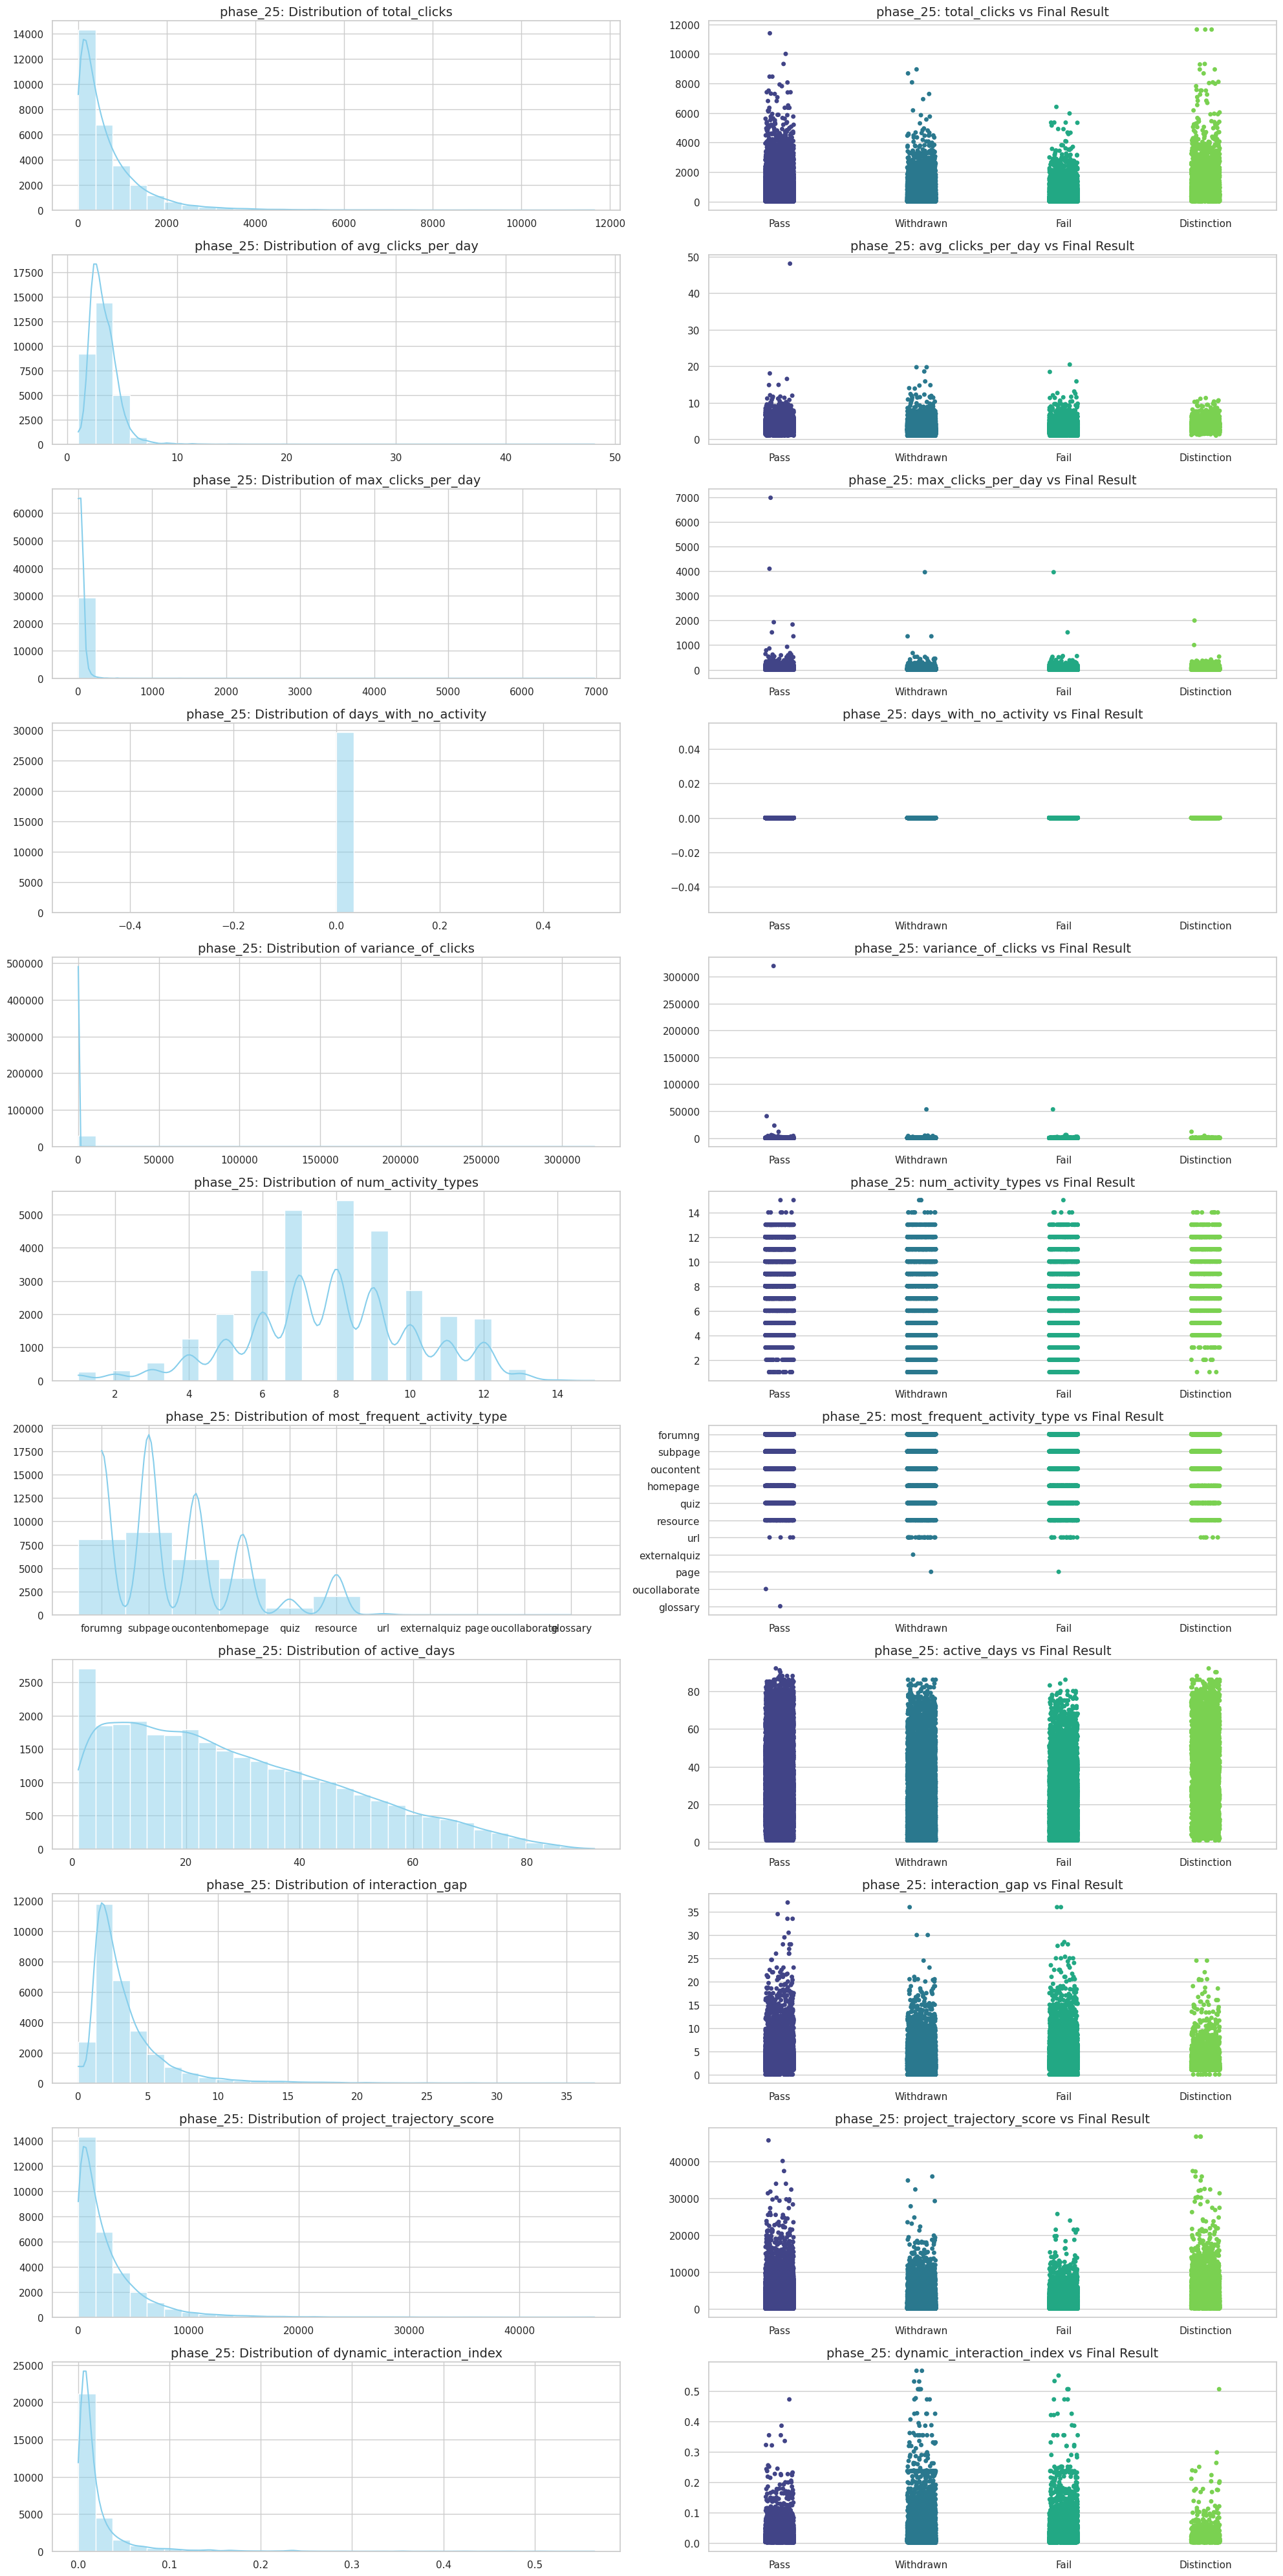

<ipython-input-29-738970d6ad56>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='final_result', y=feature, data=phase_features, palette='viridis', jitter=True)
<ipython-input-29-738970d6ad56>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='final_result', y=feature, data=phase_features, palette='viridis', jitter=True)
<ipython-input-29-738970d6ad56>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='final_result', y=feature, data=phase_features, palette='viridis', jitter=True)
<ipython-input-29-738970d6ad56>:25: FutureWarning

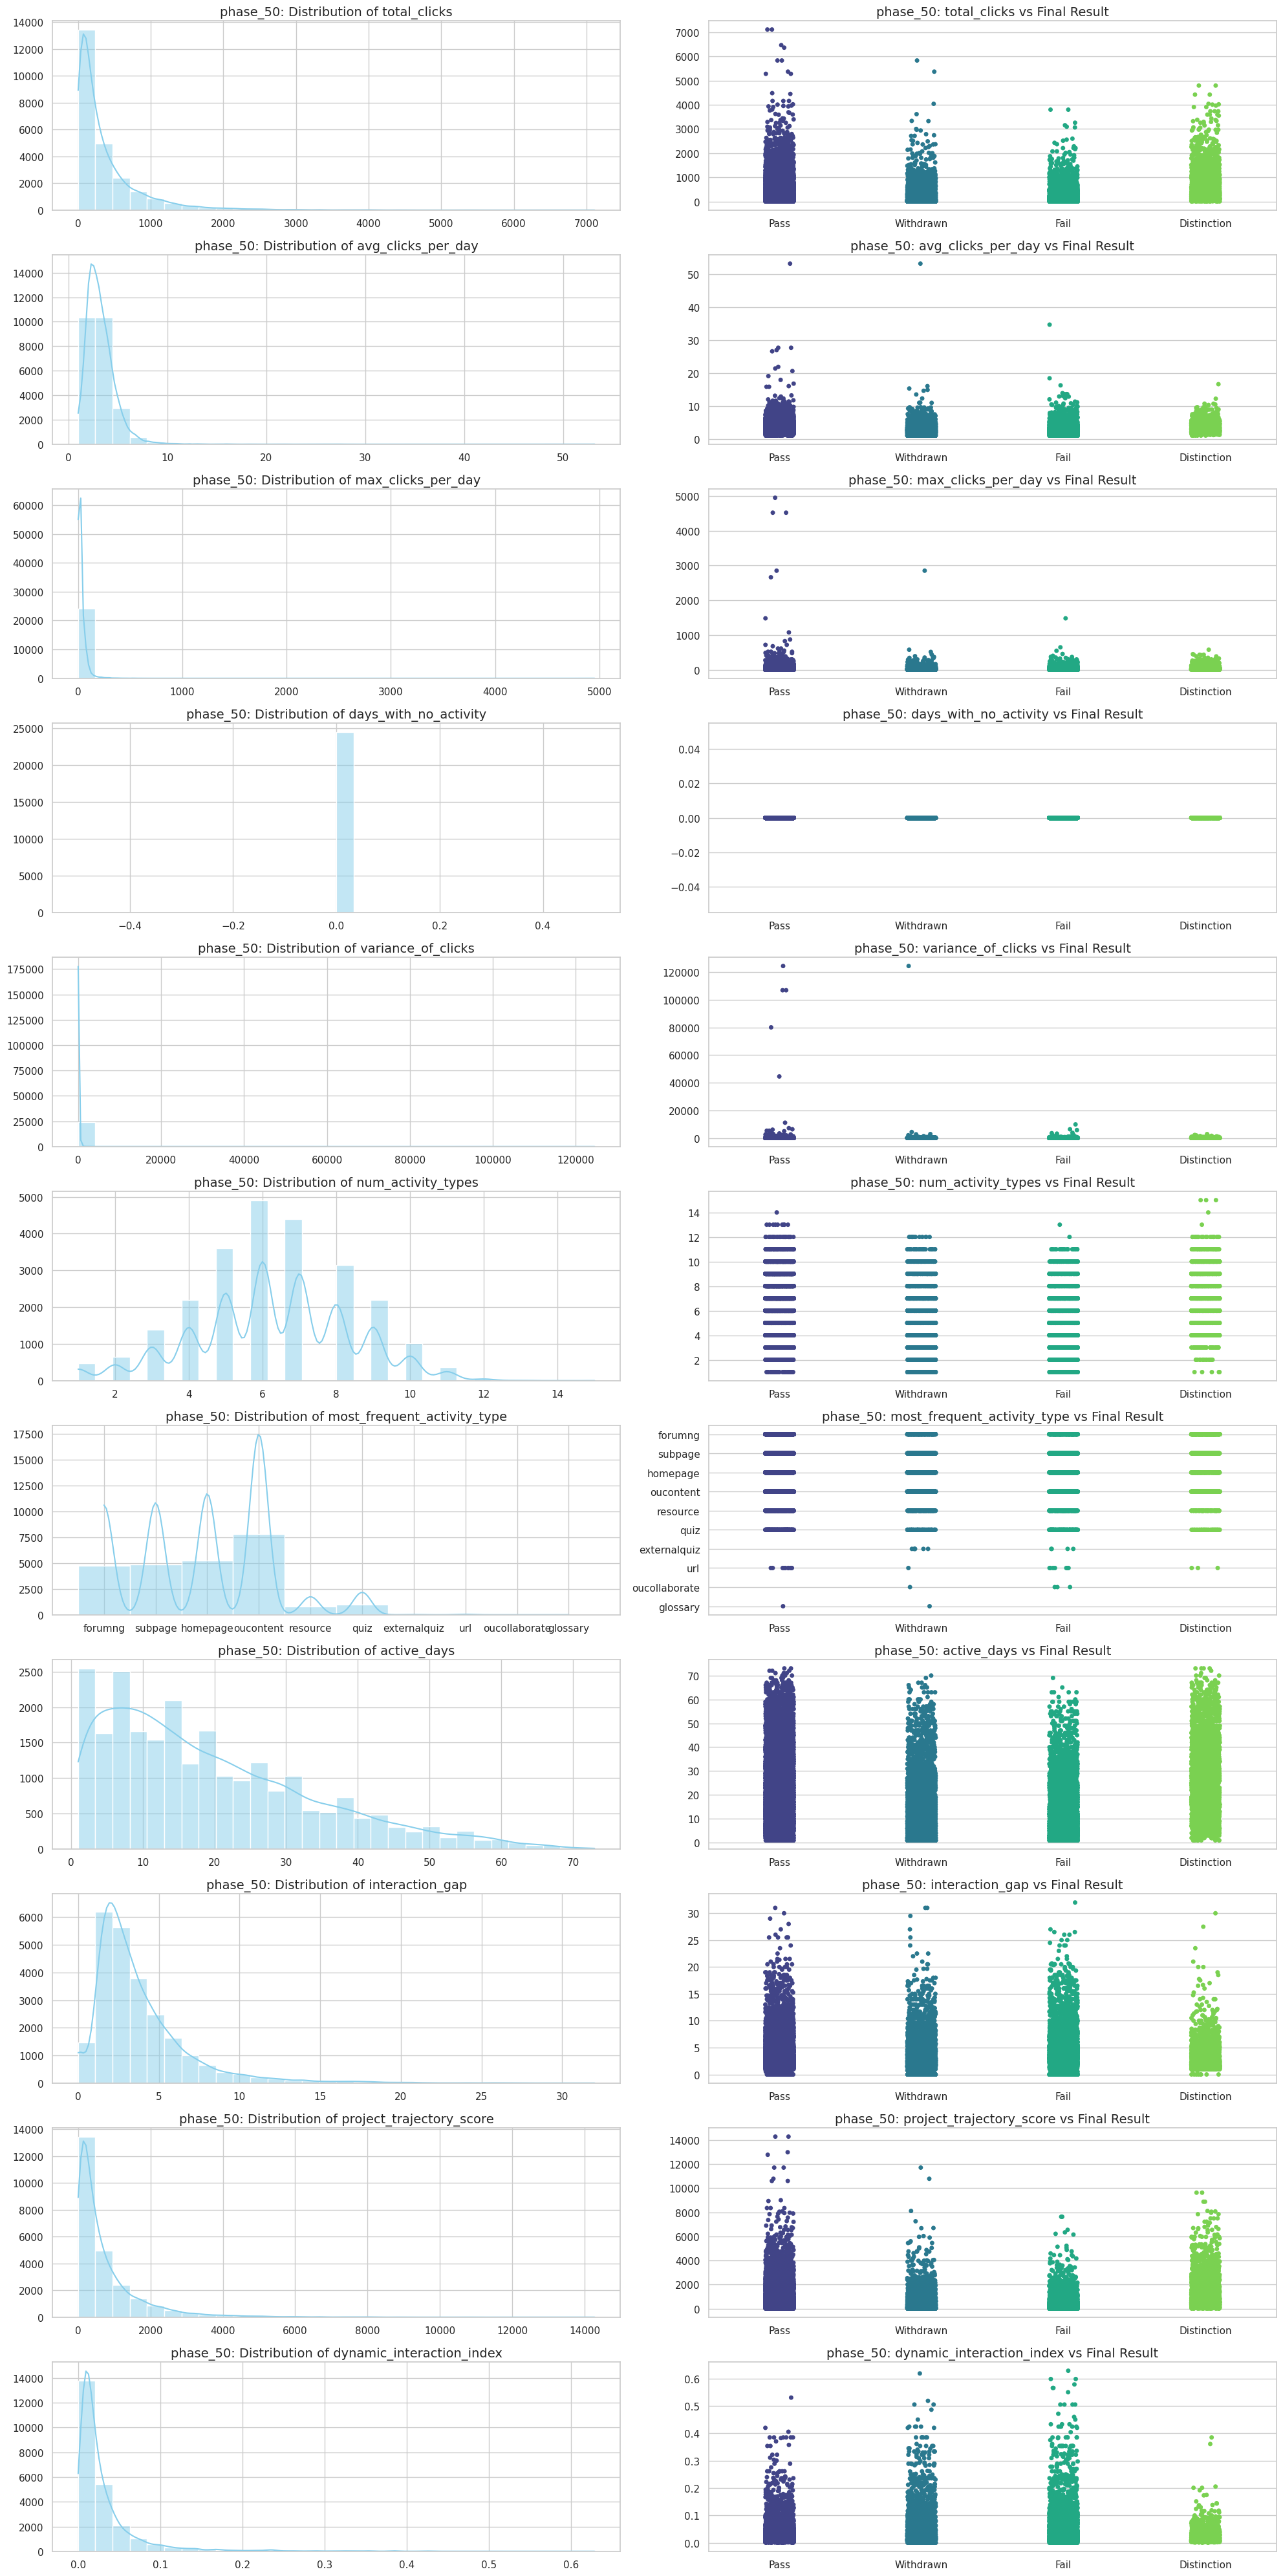

<ipython-input-29-738970d6ad56>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='final_result', y=feature, data=phase_features, palette='viridis', jitter=True)
<ipython-input-29-738970d6ad56>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='final_result', y=feature, data=phase_features, palette='viridis', jitter=True)
<ipython-input-29-738970d6ad56>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='final_result', y=feature, data=phase_features, palette='viridis', jitter=True)
<ipython-input-29-738970d6ad56>:25: FutureWarning

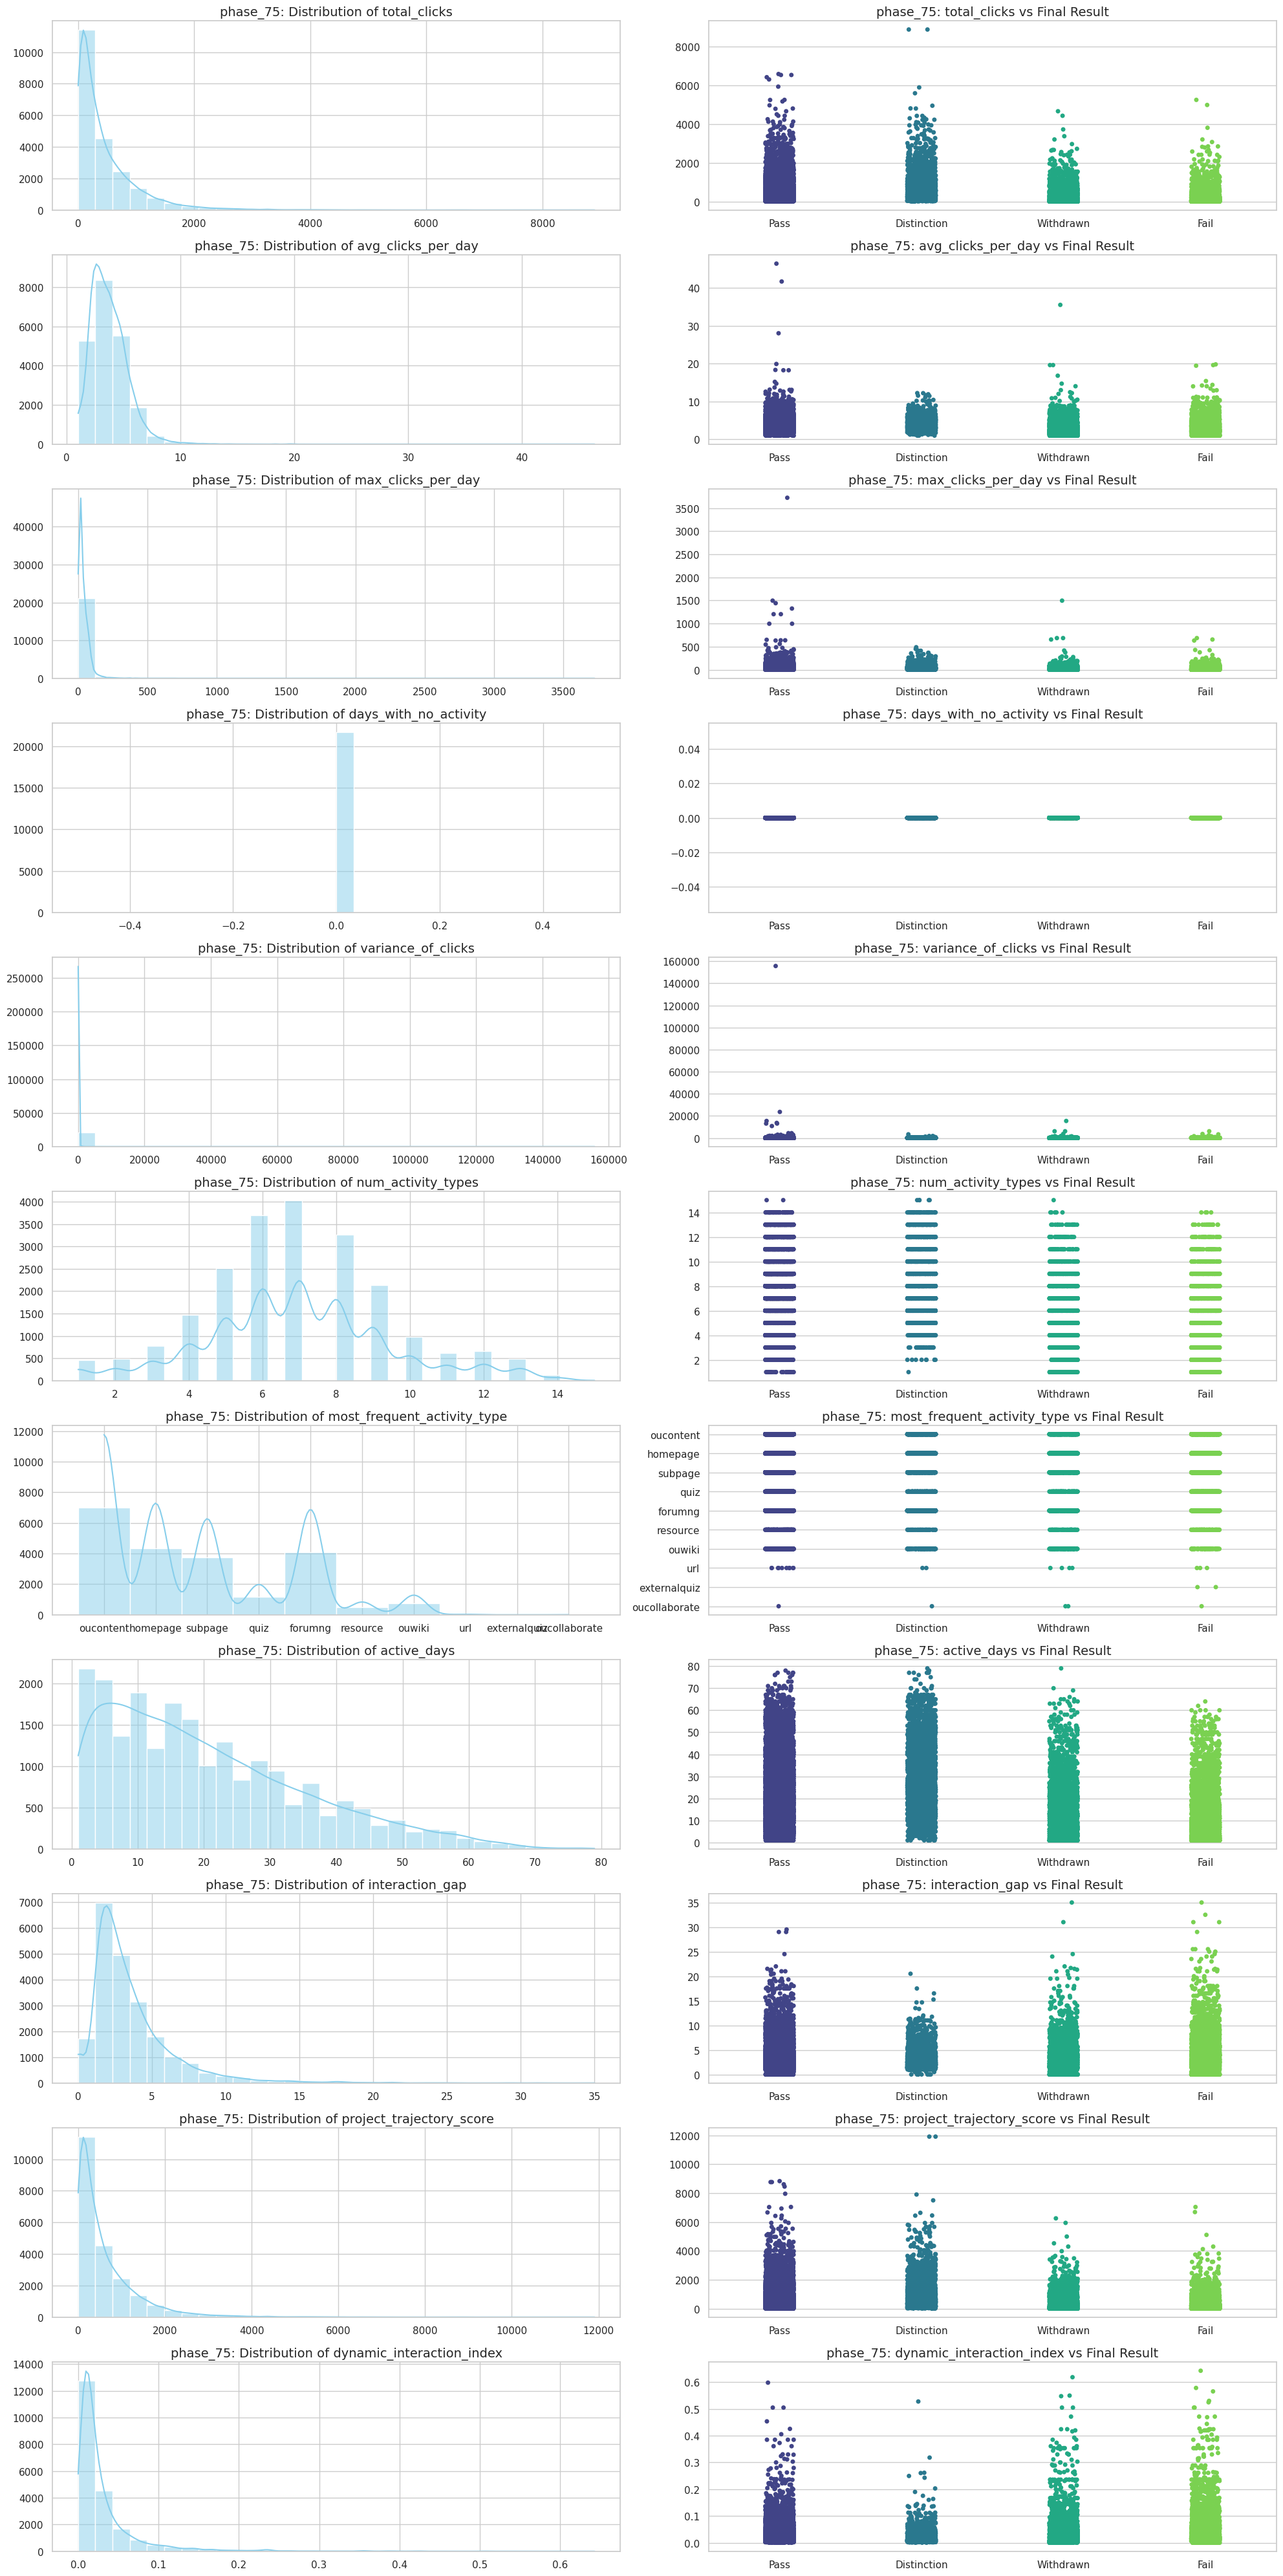

<ipython-input-29-738970d6ad56>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='final_result', y=feature, data=phase_features, palette='viridis', jitter=True)
<ipython-input-29-738970d6ad56>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='final_result', y=feature, data=phase_features, palette='viridis', jitter=True)
<ipython-input-29-738970d6ad56>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='final_result', y=feature, data=phase_features, palette='viridis', jitter=True)
<ipython-input-29-738970d6ad56>:25: FutureWarning

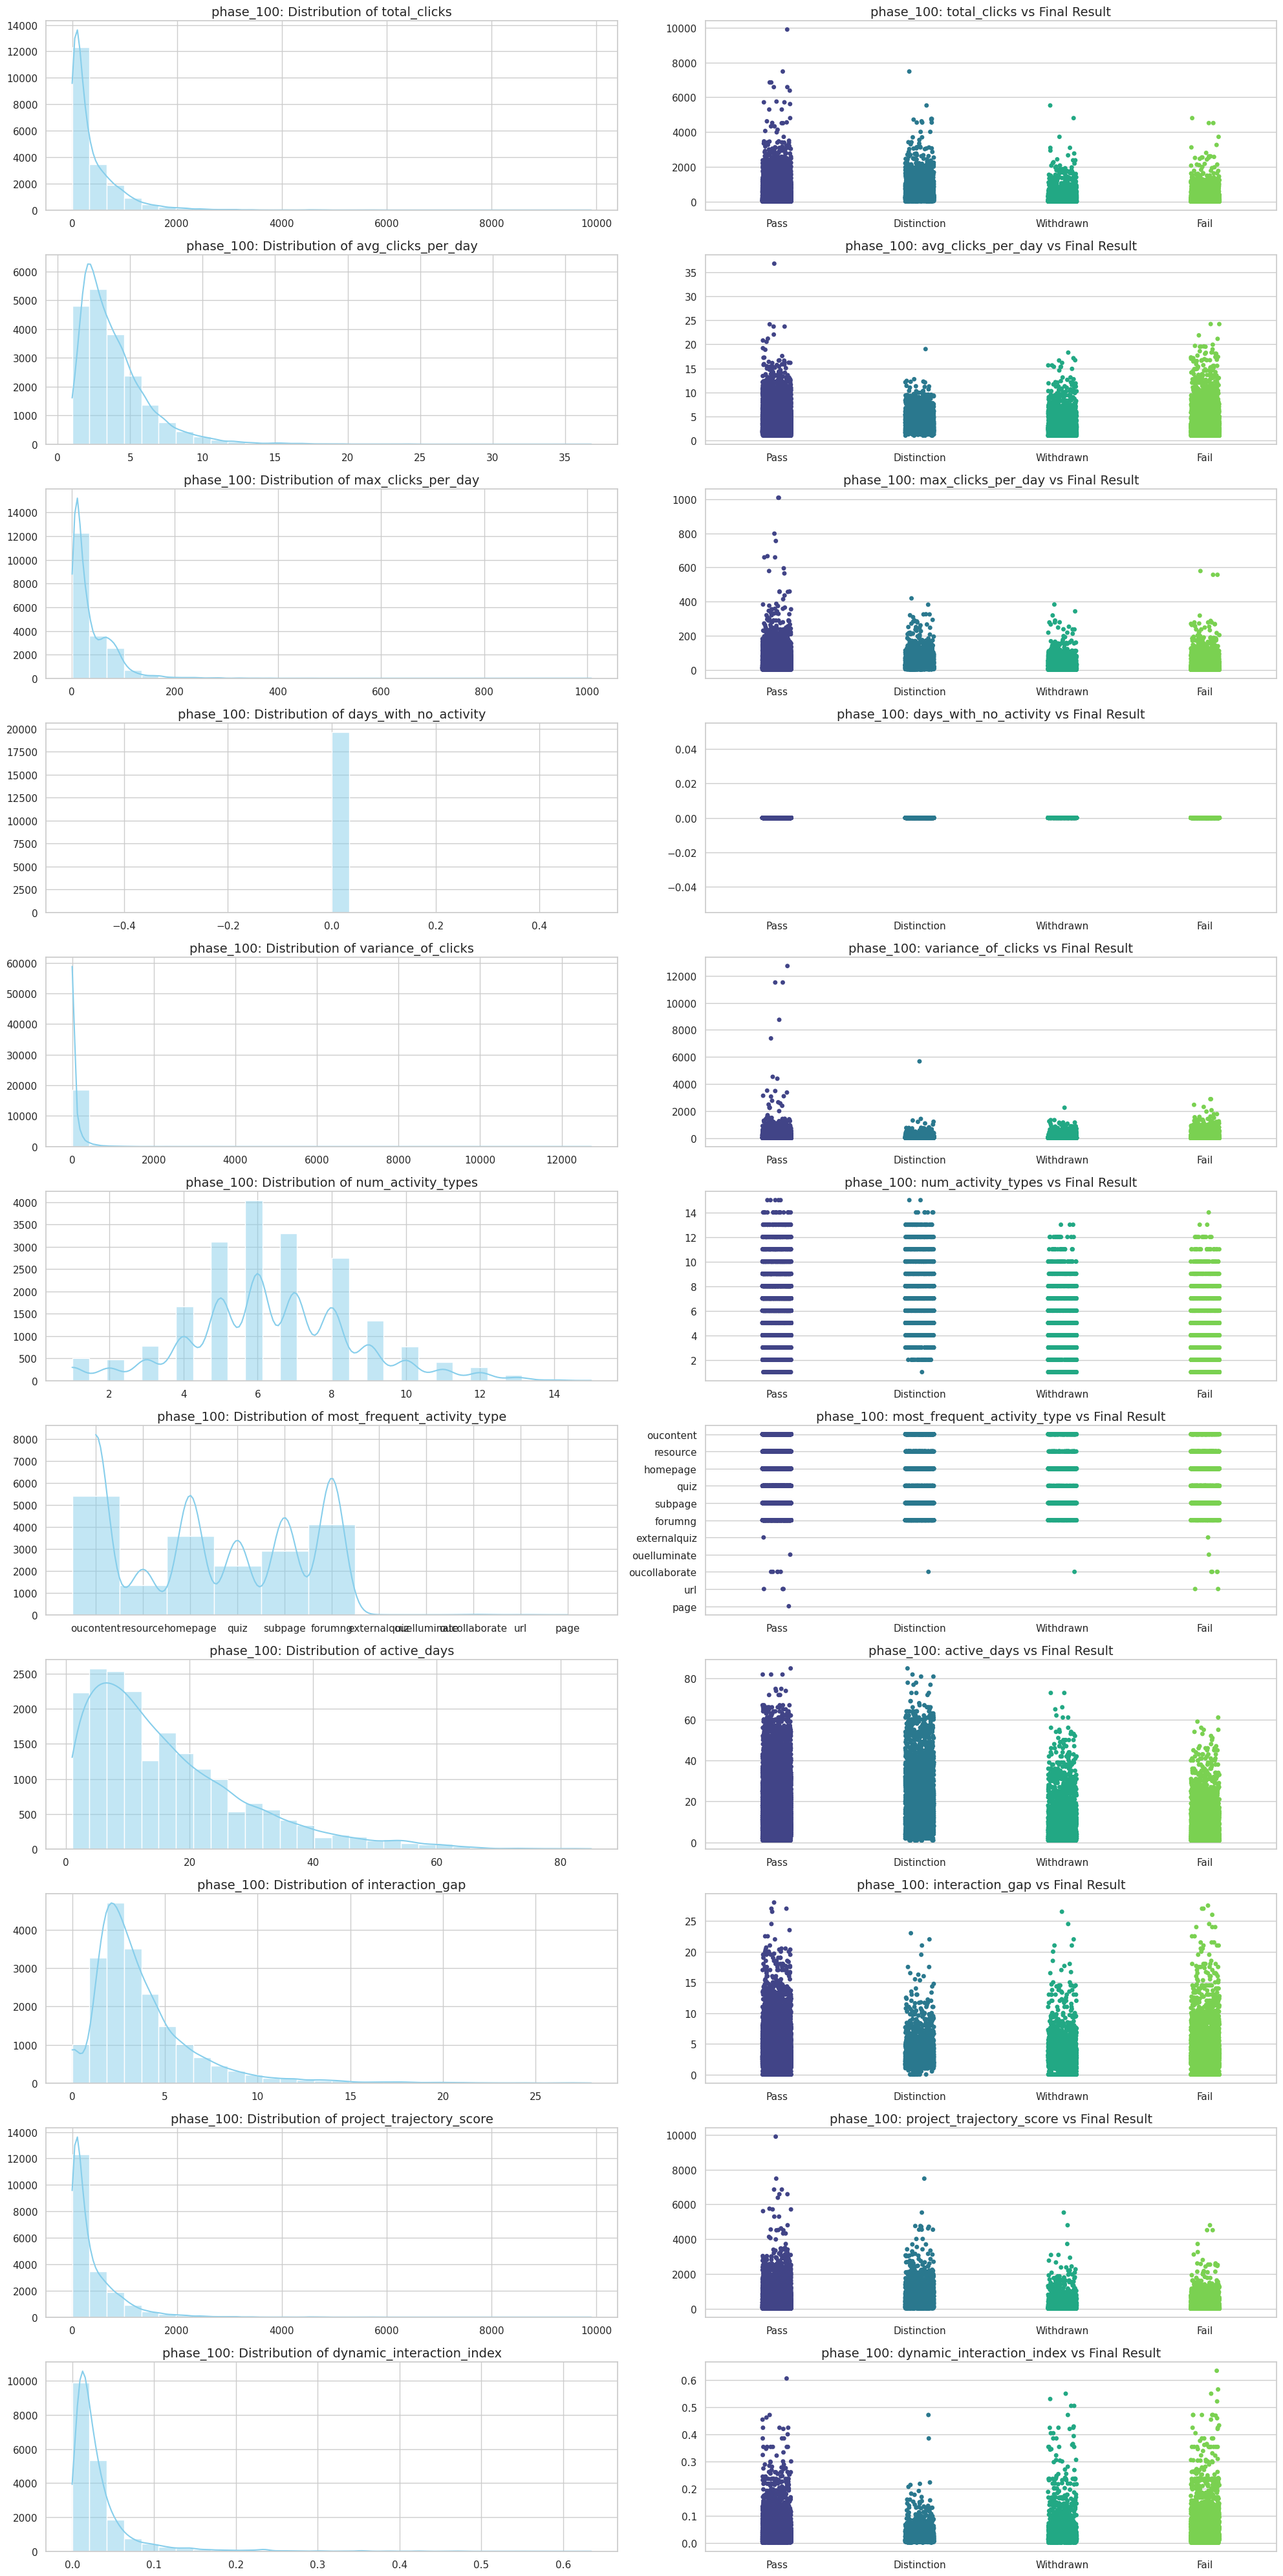

In [ ]:
def visualize_phase_features(phase_features, phase_name):
    # Define the features to plot
    features = [
        'total_clicks', 'avg_clicks_per_day', 'max_clicks_per_day', 'days_with_no_activity',
        'variance_of_clicks', 'num_activity_types', 'most_frequent_activity_type',
        'active_days', 'interaction_gap', 'project_trajectory_score', 'dynamic_interaction_index'
    ]

    # Set Seaborn theme
    sns.set_theme(style="whitegrid")

    # Set up the matplotlib figure for individual distributions and comparisons
    plt.figure(figsize=(20, 40))

    for i, feature in enumerate(features):
        # Plot histogram for feature distribution
        plt.subplot(len(features), 2, 2 * i + 1)
        sns.histplot(phase_features[feature], kde=True, bins=30, color='skyblue')
        plt.title(f'{phase_name}: Distribution of {feature}', fontsize=14)
        plt.xlabel('')
        plt.ylabel('')

        # Plot strip plot for feature vs final result
        plt.subplot(len(features), 2, 2 * i + 2)
        sns.stripplot(x='final_result', y=feature, data=phase_features, palette='viridis', jitter=True)
        plt.title(f'{phase_name}: {feature} vs Final Result', fontsize=14)
        plt.xlabel('')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Visualize features for each phase
phase_files = {
    'phase_25': '/content/phase_25_features.csv',
    'phase_50': '/content/phase_50_features.csv',
    'phase_75': '/content/phase_75_features.csv',
    'phase_100': '/content/phase_100_features.csv'
}

for phase_name, phase_file in phase_files.items():
    phase_features = pd.read_csv(phase_file)
    visualize_phase_features(phase_features, phase_name)


<ipython-input-36-953231939bd5>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='phase', y='mean', data=subset, ax=ax, ci=None)
<ipython-input-36-953231939bd5>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='phase', y='mean', data=subset, ax=ax, ci=None)
<ipython-input-36-953231939bd5>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='phase', y='mean', data=subset, ax=ax, ci=None)
<ipython-input-36-953231939bd5>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='phase', y='mean', data=subset, ax=ax, ci=None)
<ipython-input-36-953231939bd5>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='phase', y='mean', data=subset, ax=ax, ci=None)
<ipython-input-36-953231939bd5>:41:

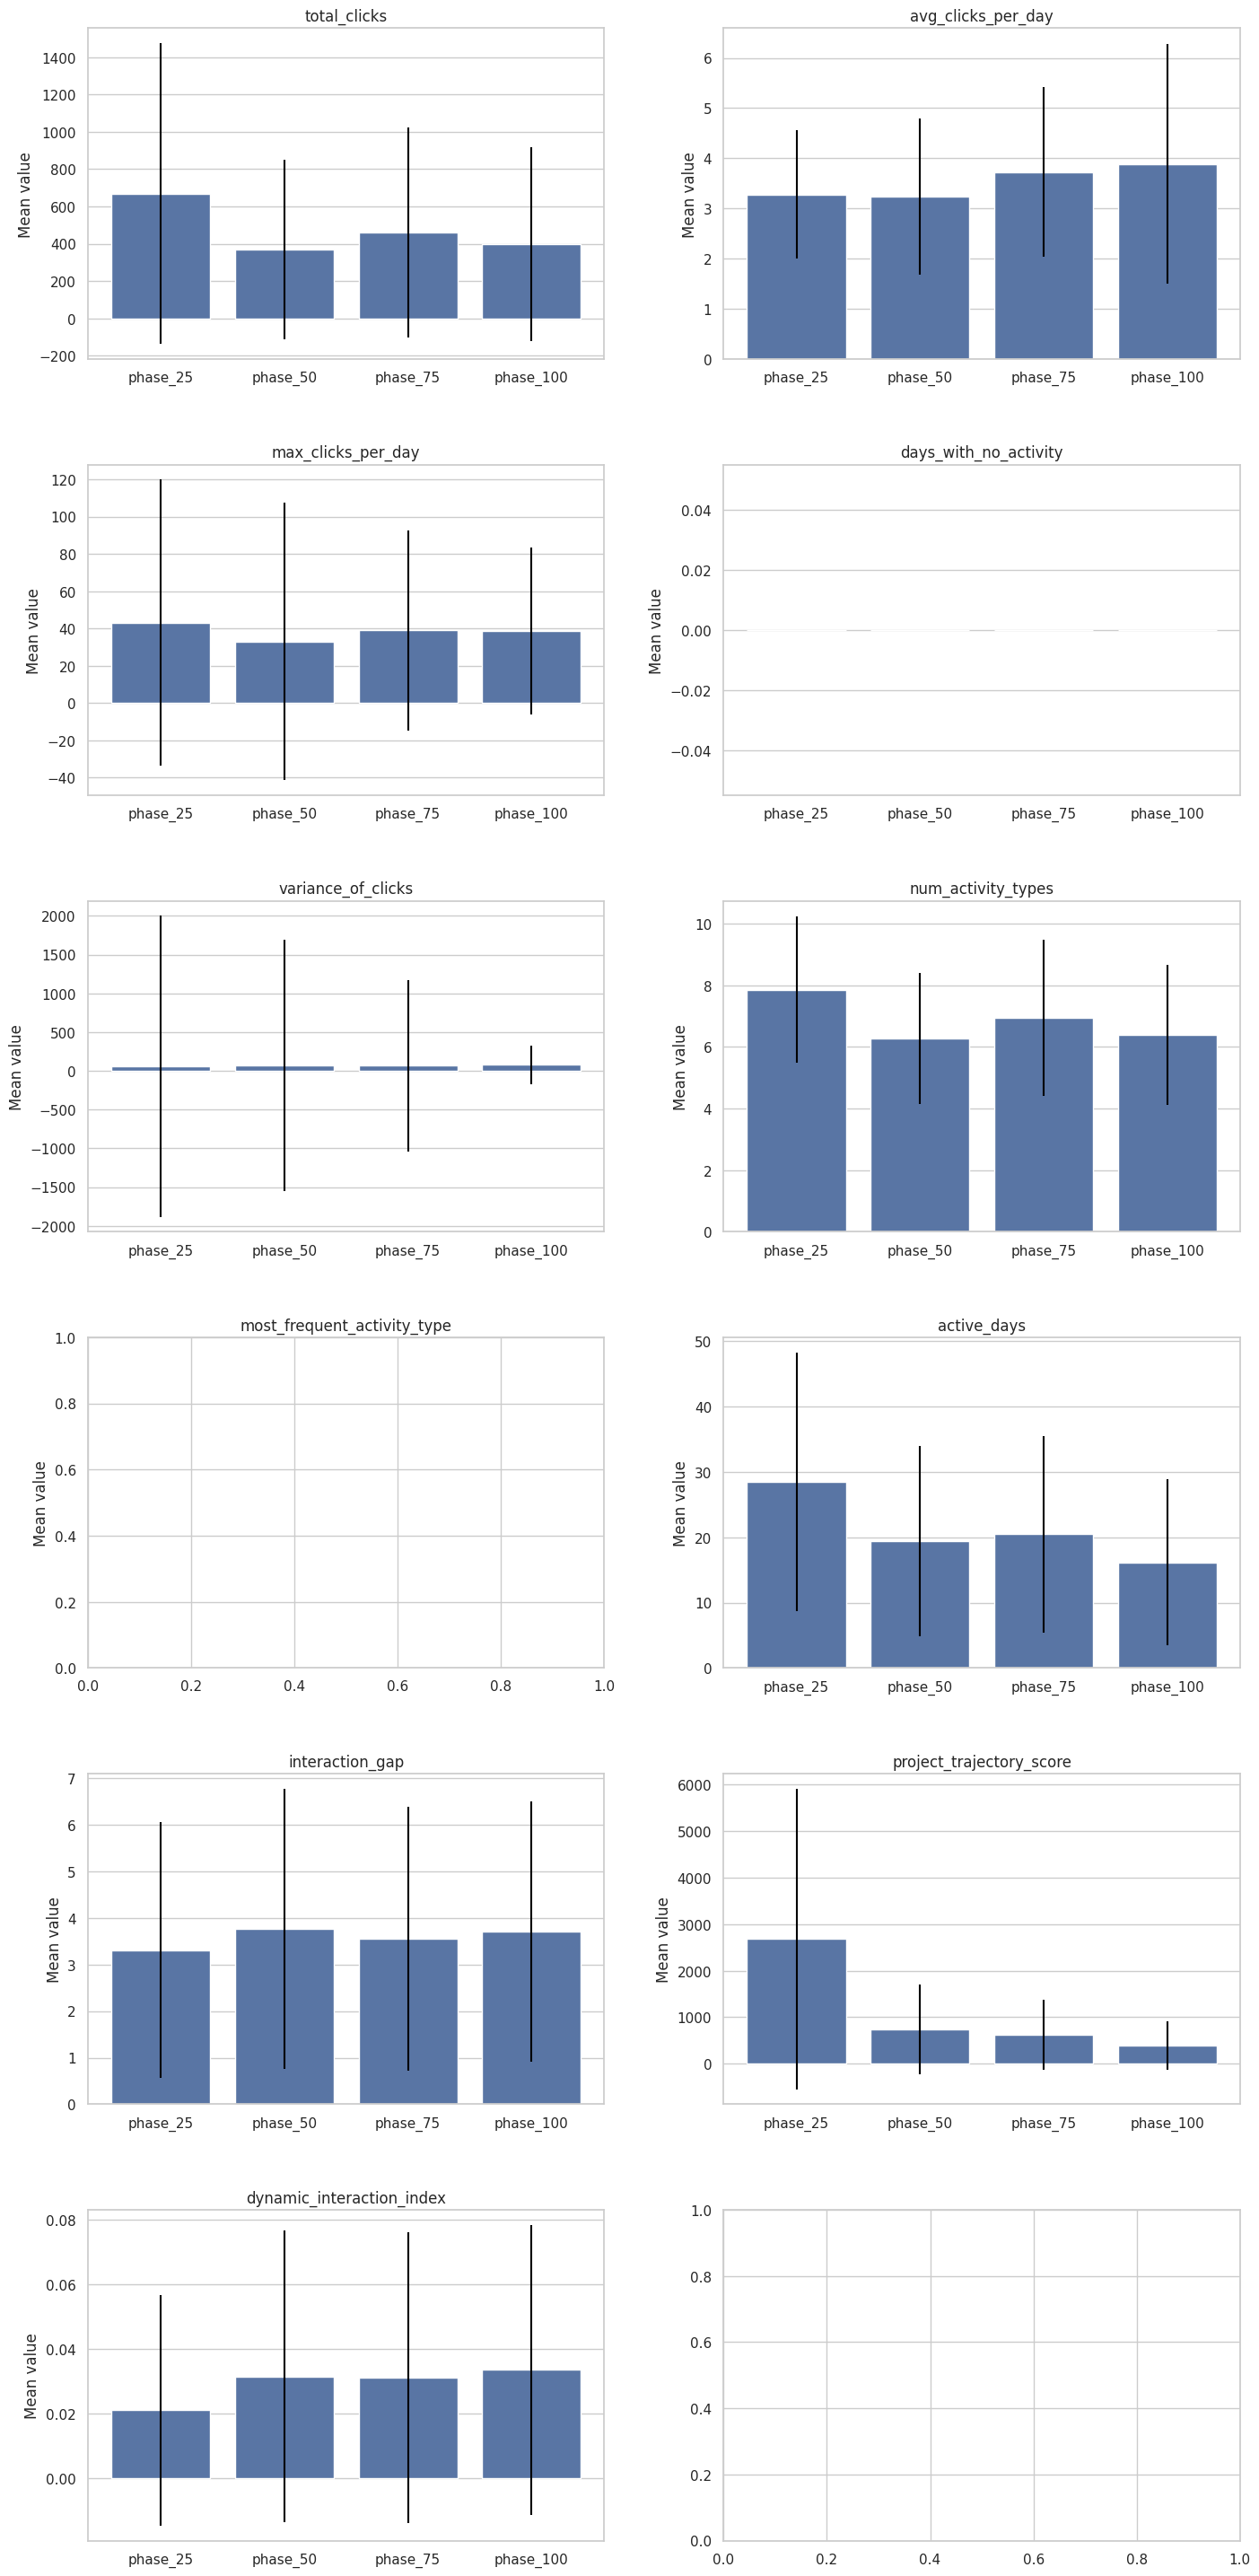

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Select the columns to compare
columns_to_compare = [
    'total_clicks', 'avg_clicks_per_day', 'max_clicks_per_day',
    'num_activity_types',
    'active_days', 'interaction_gap', 'project_trajectory_score', 'dynamic_interaction_index'
]

# Function to calculate summary statistics
def calculate_summary_statistics(df, columns):
    summary_stats = df[columns].describe().transpose()
    return summary_stats[['mean', '50%', 'std']]  # Selecting mean, median (50%), and std

# Calculate summary statistics for each phase
phase_25_summary = calculate_summary_statistics(phase_25_features, columns_to_compare)
phase_50_summary = calculate_summary_statistics(phase_50_features, columns_to_compare)
phase_75_summary = calculate_summary_statistics(phase_75_features, columns_to_compare)
phase_100_summary = calculate_summary_statistics(phase_100_features, columns_to_compare)

# Combine the summary statistics for comparison
summary_comparison = pd.concat([phase_25_summary, phase_50_summary, phase_75_summary, phase_100_summary],
                               keys=['phase_25', 'phase_50', 'phase_75', 'phase_100'])
summary_comparison = summary_comparison.rename_axis(['phase', 'feature']).reset_index()

# Plotting
sns.set(style="whitegrid")

# Create a figure and axes
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 30))
fig.tight_layout(pad=5.0)

# Plot each feature
for i, feature in enumerate(columns_to_compare):
    ax = axes[i // 2, i % 2]
    subset = summary_comparison[summary_comparison['feature'] == feature]
    sns.barplot(x='phase', y='mean', data=subset, ax=ax, ci=None)
    for j in range(subset.shape[0]):
        ax.errorbar(subset['phase'].iloc[j], subset['mean'].iloc[j], yerr=subset['std'].iloc[j], fmt='none', c='black')
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('Mean value')

# Show the plot
plt.show()
